# Pre analisis

In [10]:
import pandas as pd
import re
    
estacionario = pd.read_excel("./Datos/estacionario.xlsx")

estacionario = estacionario.drop_duplicates()
estacionario = estacionario[estacionario["Paso"] != "Promedio"]

def determinar_tipo_modelo_mejorado(row):
    """
    Determina el tipo de modelo (AR, MA, ARMA) y su orden a partir de los valores
    en las columnas 'Valores de AR' y 'Valores MA'.
    """
    ar_str = str(row['Valores de AR'])
    ma_str = str(row['Valores MA'])
    
    # Expresión regular para encontrar números (enteros o decimales, positivos o negativos)
    regex_numeros = r'-?\d+\.?\d*'
    
    # Cuenta cuántos números válidos hay en cada string
    p = len(re.findall(regex_numeros, ar_str))
    q = len(re.findall(regex_numeros, ma_str))
    
    if p > 0 and q == 0:
        return f"AR({p})"
    elif p == 0 and q > 0:
        return f"MA({q})"
    elif p > 0 and q > 0:
        return f"ARMA({p},{q})"
    else:
        return None # O "Ruido Blanco" si p=0 y q=0

# Aplica la función mejorada para crear la columna "Tipo de Modelo"
estacionario['Tipo de Modelo'] = estacionario.apply(determinar_tipo_modelo_mejorado, axis=1)

# Imprime los valores únicos de la columna Tipo de modelo para verificar
print("Valores únicos encontrados en 'Tipo de Modelo':")
print(estacionario['Tipo de Modelo'].unique())

# Ordena las columnas 'Paso' y 'Tipo de modelo' al inicio
cols = estacionario.columns.tolist()
# Aseguramos que las columnas existan antes de moverlas
if 'Paso' in cols:
    cols.insert(0, cols.pop(cols.index('Paso')))
if 'Tipo de Modelo' in cols:
    cols.insert(1, cols.pop(cols.index('Tipo de Modelo')))

estacionario = estacionario.reindex(columns=cols)


# Borra las columnas originales 'Valores de AR' y 'Valores MA'
estacionario = estacionario.drop(columns=['Valores de AR', 'Valores MA'])
estacionario["Escenario"] = "Estacionario_Lineal"

# Muestra el DataFrame resultante
estacionario

Valores únicos encontrados en 'Tipo de Modelo':
['AR(1)' 'AR(2)' 'MA(1)' 'MA(2)' 'ARMA(1,1)' 'ARMA(2,2)']


,Paso,Tipo de Modelo,Distribución,Varianza error,AREPD,AV-MCPS,Block Bootstrapping,DeepAR,EnCQR-LSTM,LSPM,LSPMW,MCPS,Sieve Bootstrap,Mejor Modelo,Escenario
0,1,AR(1),normal,0.2,0.294667,0.355344,0.248447,0.263419,0.306622,0.440706,0.431452,0.285427,0.248691,Block Bootstrapping,Estacionario_Lineal
2,2,AR(1),normal,0.2,0.604540,0.307449,0.254264,0.273001,0.565522,0.470424,0.474111,0.285430,0.254193,Sieve Bootstrap,Estacionario_Lineal
4,3,AR(1),normal,0.2,0.273622,0.276230,0.258388,0.315765,0.269452,0.520070,0.517876,0.337990,0.258039,Sieve Bootstrap,Estacionario_Lineal
6,4,AR(1),normal,0.2,0.261423,0.279697,0.254453,0.289443,0.269285,0.287989,0.288111,0.282999,0.254655,Block Bootstrapping,Estacionario_Lineal
8,5,AR(1),normal,0.2,0.626252,0.273680,0.254842,0.272827,0.639437,0.763960,0.753066,0.308347,0.254952,Block Bootstrapping,Estacionario_Lineal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,1,"ARMA(2,2)",mixture,3.0,1.082513,0.999066,0.953857,1.116455,1.053269,2.030504,2.165650,0.990087,0.954156,Block Bootstrapping,Estacionario_Lineal
1311,2,"ARMA(2,2)",mixture,3.0,1.903173,0.971148,0.954440,1.005615,1.518301,1.431610,1.522051,1.141614,0.954065,Sieve Bootstrap,Estacionario_Lineal
1313,3,"ARMA(2,2)",mixture,3.0,2.310542,1.021845,0.976235,1.002865,1.615073,1.026140,1.036051,1.484601,0.962417,Sieve Bootstrap,Estacionario_Lineal
1315,4,"ARMA(2,2)",mixture,3.0,1.324103,0.968827,0.961514,0.977739,1.072897,1.453428,1.530595,1.125230,0.960919,Sieve Bootstrap,Estacionario_Lineal


In [11]:
no_estacionario = pd.read_excel("./Datos/no_estacionario.xlsx")
no_estacionario.drop(columns=['Valores de AR', 'Valores MA'], inplace=True)
no_estacionario["Escenario"] = "No_Estacionario_Lineal"
no_estacionario = no_estacionario[no_estacionario["Paso"] != "Promedio"]
no_estacionario

,Paso,Tipo de Modelo,Distribución,Varianza error,AREPD,AV-MCPS,Block Bootstrapping,DeepAR,EnCQR-LSTM,LSPM,LSPMW,MCPS,Sieve Bootstrap,Mejor Modelo,Escenario
0,1,"ARIMA(0,1,0)",normal,0.2,1.860823,0.258474,0.253635,0.319481,0.488711,0.367279,0.360494,0.270816,0.273828,Block Bootstrapping,No_Estacionario_Lineal
1,2,"ARIMA(0,1,0)",normal,0.2,1.244128,0.528968,0.275061,0.438099,0.322919,0.426187,0.430296,0.576792,0.272952,Sieve Bootstrap,No_Estacionario_Lineal
2,3,"ARIMA(0,1,0)",normal,0.2,1.799818,0.864295,0.272406,0.291500,0.396481,0.642530,0.639134,0.269655,0.275661,MCPS,No_Estacionario_Lineal
3,4,"ARIMA(0,1,0)",normal,0.2,1.912421,0.481159,0.255186,0.291577,0.495882,0.341570,0.341227,0.533788,0.275948,Block Bootstrapping,No_Estacionario_Lineal
4,5,"ARIMA(0,1,0)",normal,0.2,2.822771,0.792130,0.257461,0.658698,1.291283,0.981902,0.969842,1.455485,0.338116,Block Bootstrapping,No_Estacionario_Lineal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,"ARIMA(2,1,2)",mixture,3.0,76.766114,5.668568,0.965836,7.254422,13.176312,4.421885,4.173484,20.231134,2.612414,Block Bootstrapping,No_Estacionario_Lineal
835,2,"ARIMA(2,1,2)",mixture,3.0,80.630681,6.161741,0.974398,8.767931,9.287902,1.733689,1.596168,21.251698,1.956761,Block Bootstrapping,No_Estacionario_Lineal
836,3,"ARIMA(2,1,2)",mixture,3.0,86.539087,10.452450,0.982561,24.631292,18.639842,6.195609,5.953120,23.480752,3.623684,Block Bootstrapping,No_Estacionario_Lineal
837,4,"ARIMA(2,1,2)",mixture,3.0,93.057798,13.911382,0.958507,27.567728,17.852720,7.288522,6.952830,28.286507,4.681807,Block Bootstrapping,No_Estacionario_Lineal


In [26]:
no_lineal = pd.read_excel("./Datos/no_lineal.xlsx")
no_lineal = no_lineal[no_lineal["Paso"] != "Promedio"]
no_lineal["Escenario"] = "No_Lineal_Estacionario"
# 1. Definir el diccionario de mapeo basado en nuestro análisis
mapeo_nombres_exacto = {
    'SETAR(2,1)': 'SETAR-1',
    'SETAR(2,2)': 'SETAR-2',
    'SETAR(2,3)': 'SETAR-3',
    'TAR(2,1)': 'SETAR-4',
    'TAR(2,2)': 'SETAR-5',
    'EXPAR(2,1)': 'SETAR Estocástico',
    'BILINEAR(1)': 'SETAR Bilinear'
}

# 2. Aplicar el reemplazo en la columna "Tipo de Modelo"
no_lineal['Tipo de Modelo'] = no_lineal['Tipo de Modelo'].replace(mapeo_nombres_exacto)

no_lineal

,Paso,Tipo de Modelo,Distribución,Varianza error,AREPD,AV-MCPS,Block Bootstrapping,DeepAR,EnCQR-LSTM,LSPM,LSPMW,MCPS,Sieve Bootstrap,Mejor Modelo,Escenario
0,1,SETAR-1,normal,0.2,0.257043,0.253521,0.251524,0.263274,0.257984,0.285655,0.282110,0.257015,0.251188,Sieve Bootstrap,No_Lineal_Estacionario
1,2,SETAR-1,normal,0.2,0.305723,0.383340,0.288529,0.297164,0.324101,0.316846,0.319675,0.347319,0.290022,Block Bootstrapping,No_Lineal_Estacionario
2,3,SETAR-1,normal,0.2,0.292055,0.258555,0.287265,0.275374,0.278881,0.320347,0.320181,0.270736,0.262183,AV-MCPS,No_Lineal_Estacionario
3,4,SETAR-1,normal,0.2,0.298469,0.269290,0.263802,0.255605,0.270449,0.290893,0.290581,0.329900,0.258734,DeepAR,No_Lineal_Estacionario
4,5,SETAR-1,normal,0.2,0.298007,0.368342,0.501202,0.323900,0.348571,0.326254,0.329508,0.423889,0.442319,AREPD,No_Lineal_Estacionario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,SETAR-3,mixture,3.0,1.164445,0.992519,0.962026,0.989297,1.046459,0.971555,1.076860,1.003262,0.961513,Sieve Bootstrap,No_Lineal_Estacionario
835,2,SETAR-3,mixture,3.0,1.191648,1.034591,0.986347,1.077081,0.972263,0.957417,0.986525,0.963721,0.984072,LSPM,No_Lineal_Estacionario
836,3,SETAR-3,mixture,3.0,1.193252,1.387456,1.012627,0.981861,0.955903,0.987603,0.977201,1.041540,1.009812,EnCQR-LSTM,No_Lineal_Estacionario
837,4,SETAR-3,mixture,3.0,1.229893,1.182221,1.124342,0.983326,0.960088,1.036372,0.978720,1.029875,1.103310,EnCQR-LSTM,No_Lineal_Estacionario


In [27]:
# Une los tres DataFrames en uno solo uno debajo de otro
df_all = pd.concat([estacionario, no_estacionario, no_lineal], ignore_index=True)
# Guarda el DataFrame combinado en un archivo Excel
df_all.to_excel("./Datos/datos_combinados.xlsx", index=False)

# Analisis Escalonado

## Analisis General Corregido*

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
from itertools import combinations
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# CONFIGURACIÓN GLOBAL
# ============================================================================

RUTA_DATOS = "./Datos/datos_combinados.xlsx"
DIR_SALIDA = "./resultados_base_completa_mejorado"

MODELOS = ['AREPD', 'AV-MCPS', 'Block Bootstrapping', 'DeepAR',
           'EnCQR-LSTM', 'LSPM', 'LSPMW', 'MCPS', 'Sieve Bootstrap']

# Colores únicos para 9 modelos
COLORES_MODELOS = {
    'AREPD': '#e41a1c',
    'AV-MCPS': '#377eb8',
    'Block Bootstrapping': '#4daf4a',
    'DeepAR': '#984ea3',
    'EnCQR-LSTM': '#ff7f00',
    'LSPM': '#ffff33',
    'LSPMW': '#a65628',
    'MCPS': '#f781bf',
    'Sieve Bootstrap': '#999999'
}

# Características para el meta-modelo
CARACTERISTICAS_META_MODELO = [
    'Estacionario', 'Lineal', 'Tipo de Modelo',
    'Distribución', 'Varianza error', 'Paso'
]
CARACTERISTICAS_NUMERICAS_META_MODELO = ['Varianza error', 'Paso']
CARACTERISTICAS_CATEGORICAS_META_MODELO = [
    'Estacionario', 'Lineal', 'Tipo de Modelo', 'Distribución'
]


# ============================================================================
# FUNCIONES AUXILIARES - TEST DIEBOLD-MARIANO (Sin cambios)
# ============================================================================

def diebold_mariano_test(errores1, errores2, h=1, alternative='two-sided'):
    """Test de Diebold-Mariano para comparar precisión de pronósticos"""
    e1 = np.asarray(errores1)
    e2 = np.asarray(errores2)

    if len(e1) != len(e2):
        raise ValueError("Los vectores de errores deben tener la misma longitud")

    n = len(e1)
    d = e1 - e2
    d_mean = np.mean(d)

    # Varianza con corrección de autocorrelación
    gamma_0 = np.var(d, ddof=1)
    gamma_sum = 0
    for k in range(1, h):
        if k < n:
            gamma_k = np.mean((d[:-k] - d_mean) * (d[k:] - d_mean))
            gamma_sum += 2 * gamma_k

    var_d = (gamma_0 + gamma_sum) / n

    # Corrección de Harvey-Leybourne-Newbold
    hlnc = np.sqrt((n + 1 - 2 * h + h * (h - 1) / n) / n)

    if var_d > 0:
        dm_stat = d_mean / np.sqrt(var_d)
        dm_stat_corrected = dm_stat * hlnc
    else:
        dm_stat = 0
        dm_stat_corrected = 0

    # P-valor
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.t.cdf(abs(dm_stat_corrected), df=n - 1))
    elif alternative == 'less':
        p_value = stats.t.cdf(dm_stat_corrected, df=n - 1)
    elif alternative == 'greater':
        p_value = 1 - stats.t.cdf(dm_stat_corrected, df=n - 1)
    else:
        raise ValueError("alternative debe ser 'two-sided', 'less' o 'greater'")

    return {
        'dm_statistic': dm_stat,
        'dm_statistic_corrected': dm_stat_corrected,
        'p_value': p_value,
        'mean_diff': d_mean,
        'modelo1_mejor': d_mean < 0,
        'n': n
    }


def comparaciones_multiples_dm(df, modelos, alpha=0.05):
    """Comparaciones múltiples con corrección de Bonferroni"""
    n_comparaciones = len(list(combinations(modelos, 2)))
    alpha_bonferroni = alpha / n_comparaciones

    resultados = []

    for modelo1, modelo2 in combinations(modelos, 2):
        try:
            dm_result = diebold_mariano_test(
                df[modelo1].values,
                df[modelo2].values,
                h=1,
                alternative='two-sided'
            )

            significativo = dm_result['p_value'] < alpha_bonferroni

            if significativo:
                if dm_result['mean_diff'] < 0:
                    ganador = modelo1
                else:
                    ganador = modelo2
            else:
                ganador = "No hay diferencia"

            resultados.append({
                'Modelo_1': modelo1,
                'Modelo_2': modelo2,
                'DM_Statistic': dm_result['dm_statistic_corrected'],
                'p_value': dm_result['p_value'],
                'p_value_bonferroni': alpha_bonferroni,
                'Significativo': significativo,
                'Ganador': ganador,
                'Diff_Media': dm_result['mean_diff']
            })

        except Exception as e:
            # print(f"Error en DM test entre {modelo1} y {modelo2}: {e}")
            continue

    return pd.DataFrame(resultados), alpha_bonferroni


def calcular_ranking_dm(df_comparaciones, modelos):
    """Calcula ranking basado en resultados DM"""
    n = len(modelos)
    matriz = pd.DataFrame(np.zeros((n, n)), index=modelos, columns=modelos)

    for _, row in df_comparaciones.iterrows():
        m1, m2 = row['Modelo_1'], row['Modelo_2']
        if row['Significativo']:
            if row['Ganador'] == m1:
                matriz.loc[m1, m2] = 1
                matriz.loc[m2, m1] = -1
            elif row['Ganador'] == m2:
                matriz.loc[m2, m1] = 1
                matriz.loc[m1, m2] = -1

    ranking_data = []
    for modelo in modelos:
        victorias = (matriz.loc[modelo] == 1).sum()
        derrotas = (matriz.loc[modelo] == -1).sum()
        empates = (matriz.loc[modelo] == 0).sum() - 1 # Excluir la comparación consigo mismo
        score = victorias - derrotas
        total_comparaciones = victorias + derrotas + empates if (victorias + derrotas + empates) > 0 else 1 # Evitar division by zero
        pct_victorias = (victorias / total_comparaciones * 100) if total_comparaciones > 0 else 0


        ranking_data.append({
            'Modelo': modelo,
            'Victorias': int(victorias),
            'Derrotas': int(derrotas),
            'Empates': int(empates),
            'Score': int(score),
            'Pct_Victorias': round(pct_victorias, 2)
        })

    df_ranking = pd.DataFrame(ranking_data)
    df_ranking = df_ranking.sort_values('Score', ascending=False).reset_index(drop=True)
    df_ranking['Rank'] = range(1, len(df_ranking) + 1)

    return df_ranking, matriz


# ============================================================================
# CLASE PRINCIPAL DE ANÁLISIS - MEJORADA
# ============================================================================

class AnalizadorBaseCompleta:
    """Análisis completo de la base de datos en 8 dimensiones + PFI/PDP/ICE"""

    def __init__(self, ruta_datos):
        """Inicializa el analizador"""
        print("\n" + "=" * 80)
        print("INICIANDO ANÁLISIS COMPLETO DE BASE DE DATOS - VERSIÓN MEJORADA")
        print("=" * 80 + "\n")

        self.df = pd.read_excel(ruta_datos)
        self.modelos = MODELOS
        self.dir_salida = Path(DIR_SALIDA)
        self.dir_salida.mkdir(parents=True, exist_ok=True)

        # Extraer características del escenario
        self._extraer_caracteristicas()

        # Preprocesar datos para meta-modelo
        self.preprocessor, self.X_processed = self._preprocess_meta_features()
        self.meta_models = {} # Almacenar meta-modelos entrenados
        self.pfi_results = {} # Almacenar resultados de PFI

        print(f"✓ Datos cargados: {self.df.shape[0]} filas, {self.df.shape[1]} columnas")
        print(f"✓ Modelos a analizar: {len(self.modelos)}")
        print(f"✓ Directorio de salida: {self.dir_salida}")
        print("\n" + "=" * 80 + "\n")

    def _extraer_caracteristicas(self):
        """Extrae características individuales del escenario (sin cambios)"""
        self.df['Estacionario'] = self.df['Escenario'].apply(
            lambda x: 'Estacionario' if 'Estacionario' in x and 'No_Estacionario' not in x else 'No Estacionario'
        )

        self.df['Lineal'] = self.df['Escenario'].apply(
            lambda x: 'Lineal' if 'Lineal' in x and 'No_Lineal' not in x else 'No Lineal'
        )

        print("✓ Características extraídas:")
        print(f"  - Estacionariedad: {self.df['Estacionario'].unique()}")
        print(f"  - Linealidad: {self.df['Lineal'].unique()}")
        print(f"  - Tipos de Modelo: {self.df['Tipo de Modelo'].unique()}")
        print(f"  - Distribuciones: {self.df['Distribución'].unique()}")
        print(f"  - Varianzas: {sorted(self.df['Varianza error'].unique())}")
        print(f"  - Pasos: {sorted(self.df['Paso'].unique())}")

    def _preprocess_meta_features(self):
        """
        Preprocesa las características para el meta-modelo (OneHotEncoding para categóricas).
        """
        numeric_features = CARACTERISTICAS_NUMERICAS_META_MODELO
        categorical_features = CARACTERISTICAS_CATEGORICAS_META_MODELO

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', 'passthrough', numeric_features),
                # AÑADIR sparse_output=False AQUÍ PARA SOLUCIONAR EL ERROR
                ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
            ],
            remainder='drop'
        )
        
        # Ajustar y transformar X
        X = self.df[CARACTERISTICAS_META_MODELO]
        X_processed_array = preprocessor.fit_transform(X)
        
        # Obtener nombres de las características preprocesadas para PFI/PDP
        # Se debe usar get_feature_names_out para versiones recientes de sklearn
        try:
            ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
        except AttributeError:
             # Fallback para versiones más antiguas
            ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names(categorical_features)
            
        feature_names = numeric_features + list(ohe_feature_names)

        # Ahora la creación del DataFrame funcionará
        return preprocessor, pd.DataFrame(X_processed_array, columns=feature_names)


    def _train_meta_model(self, target_model_name):
        """
        Entrena un RandomForestRegressor para predecir el error de un modelo de pronóstico
        basado en las características de la simulación.
        """
        if target_model_name in self.meta_models:
            return self.meta_models[target_model_name]

        print(f"   Entrenando meta-modelo para {target_model_name}...")
        y = self.df[target_model_name]
        
        # Usamos un pipeline simplificado para que PFI/PDP puedan trabajar con el preprocesador
        # directamente si fuera necesario, aunque aquí ya pasamos X_processed.
        # En este caso, el preprocessor ya se usó para obtener X_processed.
        # Creamos solo el modelo RandomForestRegressor.
        
        meta_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        meta_model.fit(self.X_processed, y)
        self.meta_models[target_model_name] = meta_model
        print(f"   ✓ Meta-modelo entrenado para {target_model_name}.")
        return meta_model

    def ejecutar_analisis_completo(self):
        """Ejecuta todos los análisis, incluyendo los nuevos"""
        print("\n" + "🔬" * 40 + "\n")

        # 1. Impacto de Estacionariedad
        print("1️⃣  Analizando impacto de Escenarios (Estacionariedad y Linealidad)...")
        self._analisis_estacionariedad()

        # 2. Impacto de Linealidad
        print("2️⃣  Analizando impacto de Linealidad...")
        self._analisis_linealidad()

        # 3. Efecto del Modelo Generador
        print("3️⃣  Analizando efecto del Modelo Generador...")
        self._analisis_modelo_generador()

        # 4. Influencia de Distribución
        print("4️⃣  Analizando influencia de Distribución...")
        self._analisis_distribucion()

        # 5. Impacto de Varianza
        print("5️⃣  Analizando impacto de Varianza...")
        self._analisis_varianza()

        # 6. Deterioro por Horizonte
        print("6️⃣  Analizando deterioro por Horizonte...")
        self._analisis_horizonte()

        # 7. Robustez y Estabilidad
        print("7️⃣  Analizando Robustez y Estabilidad...")
        self._analisis_robustez()

        # 8. Diferencias Estadísticamente Significativas
        print("8️⃣  Analizando Diferencias Estadísticamente Significativas...")
        self._analisis_significancia()

        # ANÁLISIS 9 Y 10 DESHABILITADOS POR SOLICITUD
        print("\n9️⃣  Análisis de Impacto de Características (PFI) OMITIDO.")
        print("\n🔟 Análisis de Variabilidad (PDP e ICE) OMITIDO.")
        print("\n✨ Resumen Ejecutivo OMITIDO.")
        # self._analisis_impacto_pfi()
        # self._analisis_variabilidad_pdp_ice()
        # self._generar_resumen_ejecutivo()

        print("\n" + "=" * 80)
        print("✅ ANÁLISIS COMPLETO FINALIZADO")
        print(f"📁 Resultados guardados en: {self.dir_salida}")
        print("=" * 80 + "\n")

    # ========================================================================
    # 1 y 2. IMPACTO DE ESCENARIOS (CONSOLIDADO)
    # ========================================================================

    def _analisis_estacionariedad(self):
        """Analiza el impacto de los 4 escenarios combinados"""
        
        # Crear columna con combinación de Estacionariedad y Linealidad
        self.df['Escenario_Combinado'] = self.df['Estacionario'] + ' - ' + self.df['Lineal']
        
        escenarios_orden = [
            'Estacionario - Lineal',
            'Estacionario - No Lineal', 
            'No Estacionario - Lineal'
        ]
        
        # Calcular estadísticas por escenario combinado
        stats_esc = []
        for modelo in self.modelos:
            for esc in escenarios_orden:
                df_subset = self.df[self.df['Escenario_Combinado'] == esc]
                stats_esc.append({
                    'Modelo': modelo,
                    'Escenario': esc,
                    'Media': df_subset[modelo].mean(),
                    'Std': df_subset[modelo].std()
                })
        
        df_stats = pd.DataFrame(stats_esc)
        
        # FIGURA 1.1: Rendimiento por escenario (barras agrupadas verticales)
        fig, ax = plt.subplots(figsize=(16, 9))
        pivot_media = df_stats.pivot(index='Modelo', columns='Escenario', values='Media')
        pivot_media = pivot_media[escenarios_orden]  # Ordenar columnas
        pivot_media = pivot_media.sort_values(escenarios_orden[0])  # Ordenar por baseline
        
        x = np.arange(len(pivot_media))
        width = 0.2
        
        colores_escenarios = {
            'Estacionario - Lineal': '#2E7D32',  # Verde oscuro
            'Estacionario - No Lineal': '#66BB6A',  # Verde claro
            'No Estacionario - Lineal': '#F57C00',  # Naranja
            'No Estacionario - No Lineal': '#D32F2F'  # Rojo
        }
        
        for i, esc in enumerate(escenarios_orden):
            offset = width * (i - 1.5)
            ax.bar(x + offset, pivot_media[esc], width,
                   label=esc, color=colores_escenarios[esc], 
                   edgecolor='black', linewidth=1.2, alpha=0.85)
        
        ax.set_xlabel('Modelos Predictores', fontweight='bold', fontsize=13)
        ax.set_ylabel('ECRPS Promedio', fontweight='bold', fontsize=13)
        ax.set_title('Rendimiento por Escenario: Comparación Completa',
                     fontweight='bold', fontsize=15, pad=20)
        ax.set_xticks(x)
        ax.set_xticklabels(pivot_media.index, rotation=45, ha='right', fontsize=11)
        ax.legend(title='Escenario', fontsize=10, title_fontsize=11, loc='best')
        ax.grid(True, alpha=0.3, axis='y', linestyle='--')
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / '1_1_escenarios_rendimiento_completo.png',
                    dpi=300, bbox_inches='tight')
        plt.close()
        
        # FIGURA 1.2: Cambio relativo respecto al baseline (Estacionario-Lineal)
        fig, ax = plt.subplots(figsize=(14, 10))
        
        baseline = pivot_media[escenarios_orden[0]]
        cambios_relativos = {}
        
        for esc in escenarios_orden[1:]:  # Excluir baseline
            cambio = ((pivot_media[esc] - baseline) / baseline * 100)
            cambios_relativos[esc] = cambio
        
        df_cambios = pd.DataFrame(cambios_relativos)
        df_cambios = df_cambios.sort_values(escenarios_orden[1])  # Ordenar por primer escenario no-baseline
        
        x_models = np.arange(len(df_cambios))
        width = 0.25
        
        for i, esc in enumerate(escenarios_orden[1:]):
            offset = width * (i - 1)
            colors = ['green' if val < 0 else 'red' for val in df_cambios[esc].values]
            ax.barh(x_models + offset, df_cambios[esc].values, width,
                   label=esc, color=colores_escenarios[esc], 
                   alpha=0.75, edgecolor='black', linewidth=1.2)
        
        ax.axvline(0, color='black', linestyle='-', linewidth=2.5)
        ax.set_yticks(x_models)
        ax.set_yticklabels(df_cambios.index, fontsize=11)
        ax.set_xlabel('Cambio Relativo vs Estacionario-Lineal (%)', fontweight='bold', fontsize=13)
        ax.set_ylabel('Modelos Predictores', fontweight='bold', fontsize=13)
        ax.set_title('Deterioro Relativo por Escenario\n(Baseline: Estacionario-Lineal)',
                     fontweight='bold', fontsize=15, pad=20)
        ax.legend(title='Escenario', fontsize=10, title_fontsize=11, loc='best')
        ax.grid(True, alpha=0.3, axis='x', linestyle='--')
        
        # Añadir valores en las barras
        for i, esc in enumerate(escenarios_orden[1:]):
            offset = width * (i - 1)
            for j, val in enumerate(df_cambios[esc].values):
                x_pos = val + (2 if val > 0 else -2)
                ha = 'left' if val > 0 else 'right'
                ax.text(x_pos, j + offset, f'{val:.1f}%',
                       va='center', ha=ha, fontweight='bold', fontsize=8)
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / '1_2_escenarios_cambio_relativo.png',
                    dpi=300, bbox_inches='tight')
        plt.close()
        
        print("   ✓ 2 figuras generadas para análisis de escenarios consolidado\n")

    def _analisis_linealidad(self):
        """Esta función ya no genera figuras separadas - integrada en _analisis_estacionariedad"""
        print("   ℹ️  Análisis de linealidad integrado en análisis de escenarios\n")

    # ========================================================================
    # 3. EFECTO DEL MODELO GENERADOR (Sin cambios funcionales, solo prints)
    # ========================================================================

    def _analisis_modelo_generador(self):
        """Analiza el efecto del modelo generador de datos"""

        pivot_media = self.df.groupby('Tipo de Modelo')[self.modelos].mean()
        tipos = self.df['Tipo de Modelo'].unique()

        # FIGURA 3.2: Heatmap normalizado (Z-scores)
        fig, ax = plt.subplots(figsize=(20, 10))

        pivot_norm = pivot_media.T.sub(pivot_media.T.mean(axis=1), axis=0).div(pivot_media.T.std(axis=1), axis=0)

        sns.heatmap(pivot_norm, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
                    ax=ax, cbar_kws={'label': 'Z-Score'},
                    linewidths=0.5, linecolor='gray', vmin=-2, vmax=2,
                    annot_kws={'fontsize': 8})
        ax.set_xlabel('Tipo de Modelo Generador', fontweight='bold', fontsize=13, labelpad=15)
        ax.set_ylabel('Modelo de Predicción', fontweight='bold', fontsize=13, labelpad=10)
        ax.set_title('ECRPS Relativo (Z-Score por Modelo)',
                     fontweight='bold', fontsize=15, pad=20)
        
        # Ajustar etiquetas del eje X para evitar superposición
        ax.tick_params(axis='x', rotation=45, labelsize=9)
        ax.tick_params(axis='y', rotation=0, labelsize=11)
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right', va='top')
        plt.setp(ax.get_yticklabels(), rotation=0, ha='right', va='center')

        plt.tight_layout()
        plt.savefig(self.dir_salida / '3_2_modelo_generador_zscore.png',
                    dpi=300, bbox_inches='tight')
        plt.close()

        # FIGURA 3.3: Variabilidad por tipo
        fig, ax = plt.subplots(figsize=(12, 8))

        rankings = []
        for tipo in tipos:
            df_tipo = self.df[self.df['Tipo de Modelo'] == tipo]
            medias = df_tipo[self.modelos].mean().sort_values()
            rankings.append({
                'Tipo': tipo,
                'Mejor_Modelo': medias.index[0],
                'Mejor_ECRPS': medias.values[0],
                'Peor_Modelo': medias.index[-1],
                'Peor_ECRPS': medias.values[-1],
                'Rango': medias.values[-1] - medias.values[0]
            })

        df_rankings = pd.DataFrame(rankings).sort_values('Rango', ascending=False)

        y_pos = np.arange(len(df_rankings))
        bars = ax.barh(y_pos, df_rankings['Rango'].values,
                       color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(df_rankings['Tipo'].values, fontsize=10)
        ax.set_xlabel('Rango de ECRPS (Max - Min)', fontweight='bold', fontsize=12)
        ax.set_title('Variabilidad por Tipo de Generador',
                     fontweight='bold', fontsize=14, pad=20)
        ax.grid(True, alpha=0.3, axis='x')

        for i, (bar, val) in enumerate(zip(bars, df_rankings['Rango'].values)):
            ax.text(val + 0.001, i, f'{val:.3f}', va='center', fontweight='bold', fontsize=10)

        plt.tight_layout()
        plt.savefig(self.dir_salida / '3_3_modelo_generador_variabilidad.png',
                    dpi=300, bbox_inches='tight')
        plt.close()

        print("   ✓ 2 figuras generadas para modelo generador\n")

    # ========================================================================
    # 4. INFLUENCIA DE LA DISTRIBUCIÓN (Sin cambios funcionales, solo prints)
    # ========================================================================

    def _analisis_distribucion(self):
        """Analiza la influencia de la distribución de errores"""

        pivot_media = self.df.groupby('Distribución')[self.modelos].mean()
        pivot_std = self.df.groupby('Distribución')[self.modelos].std()

        # FIGURA 4.1: Heatmap de rendimiento
        fig, ax = plt.subplots(figsize=(14, 10))

        sns.heatmap(pivot_media.T, annot=True, fmt='.3f', cmap='RdYlGn_r',
                    ax=ax, cbar_kws={'label': 'ECRPS Promedio'},
                    linewidths=0.5, linecolor='gray')
        ax.set_xlabel('Distribución de Errores', fontweight='bold', fontsize=12)
        ax.set_ylabel('Modelo de Predicción', fontweight='bold', fontsize=12)
        ax.set_title('ECRPS por Distribución de Errores',
                     fontweight='bold', fontsize=14, pad=20)
        ax.tick_params(axis='x', rotation=45, labelsize=10)
        ax.tick_params(axis='y', rotation=0, labelsize=10)

        plt.tight_layout()
        plt.savefig(self.dir_salida / '4_1_distribucion_heatmap_rendimiento.png',
                    dpi=300, bbox_inches='tight')
        plt.close()

        # FIGURA 4.2: Heatmap de variabilidad
        fig, ax = plt.subplots(figsize=(14, 10))

        sns.heatmap(pivot_std.T, annot=True, fmt='.3f', cmap='YlOrRd',
                    ax=ax, cbar_kws={'label': 'Desviación Estándar'},
                    linewidths=0.5, linecolor='gray')
        ax.set_xlabel('Distribución de Errores', fontweight='bold', fontsize=12)
        ax.set_ylabel('Modelo de Predicción', fontweight='bold', fontsize=12)
        ax.set_title('Variabilidad por Distribución de Errores',
                     fontweight='bold', fontsize=14, pad=20)
        ax.tick_params(axis='x', rotation=45, labelsize=10)
        ax.tick_params(axis='y', rotation=0, labelsize=10)

        plt.tight_layout()
        plt.savefig(self.dir_salida / '4_2_distribucion_heatmap_variabilidad.png',
                    dpi=300, bbox_inches='tight')
        plt.close()

        print("   ✓ 2 figuras generadas para distribución\n")

    # ========================================================================
    # 5. IMPACTO DE VARIANZA (MODIFICADO PARA AGRUPAR POR ESCENARIO)
    # ========================================================================

    def _analisis_varianza(self):
        """Analiza el impacto del nivel de varianza (ruido) POR ESCENARIO"""
        
        # Asegurarse de que la columna del escenario combinado exista
        if 'Escenario_Combinado' not in self.df.columns:
            self.df['Escenario_Combinado'] = self.df['Estacionario'] + ' - ' + self.df['Lineal']
        
        escenarios = self.df['Escenario_Combinado'].unique()
        varianzas = sorted(self.df['Varianza error'].unique())

        for escenario in escenarios:
            df_escenario = self.df[self.df['Escenario_Combinado'] == escenario]
            escenario_filename = escenario.replace(' ', '_').replace('-', '')

            # FIGURA 5.1: Líneas de tendencia por escenario
            fig, ax = plt.subplots(figsize=(14, 8))

            for modelo in self.modelos:
                medias = [df_escenario[df_escenario['Varianza error'] == v][modelo].mean()
                          for v in varianzas]
                ax.plot(varianzas, medias, marker='o', label=modelo,
                        linewidth=2.5, markersize=8, color=COLORES_MODELOS[modelo])

            ax.set_xlabel('Nivel de Varianza', fontweight='bold', fontsize=12)
            ax.set_ylabel('ECRPS Promedio', fontweight='bold', fontsize=12)
            ax.set_title(f'Deterioro con Aumento de Varianza\nEscenario: {escenario}',
                         fontweight='bold', fontsize=14, pad=20)
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
            ax.grid(True, alpha=0.3)
            ax.set_xticks(varianzas)

            plt.tight_layout()
            plt.savefig(self.dir_salida / f'5_1_varianza_tendencias_{escenario_filename}.png',
                        dpi=300, bbox_inches='tight')
            plt.close()

            # FIGURA 5.2: Tasa de crecimiento por escenario
            fig, ax = plt.subplots(figsize=(12, 8))

            tasas_crecimiento = {}
            for modelo in self.modelos:
                medias = [df_escenario[df_escenario['Varianza error'] == v][modelo].mean()
                          for v in varianzas]
                if len(medias) > 1 and all(pd.notna(m) for m in medias):
                    pendiente = (medias[-1] - medias[0]) / (varianzas[-1] - varianzas[0])
                    tasas_crecimiento[modelo] = pendiente

            if not tasas_crecimiento:
                print(f"      No hay datos suficientes para calcular tasas de crecimiento en el escenario: {escenario}")
                continue

            tc_sorted = dict(sorted(tasas_crecimiento.items(), key=lambda x: x[1]))
            median_val = np.median(list(tc_sorted.values()))

            colors_tc = ['green' if v < median_val else 'red'
                         for v in tc_sorted.values()]
            bars = ax.barh(range(len(tc_sorted)), list(tc_sorted.values()),
                           color=colors_tc, alpha=0.7, edgecolor='black', linewidth=1.5)
            ax.set_yticks(range(len(tc_sorted)))
            ax.set_yticklabels(list(tc_sorted.keys()), fontsize=10)
            ax.set_xlabel('Tasa de Crecimiento del Error', fontweight='bold', fontsize=12)
            ax.set_title(f'Sensibilidad al Ruido\nEscenario: {escenario} (Menor = Más Robusto)',
                         fontweight='bold', fontsize=14, pad=20)
            ax.axvline(median_val, color='black',
                       linestyle='--', linewidth=2, label='Mediana')
            ax.grid(True, alpha=0.3, axis='x')
            ax.legend(fontsize=11)

            for i, (bar, val) in enumerate(zip(bars, tc_sorted.values())):
                ax.text(val + (0.0001 if val > 0 else -0.0001), i, f'{val:.4f}',
                        va='center', ha='left' if val > 0 else 'right',
                        fontweight='bold', fontsize=9)

            plt.tight_layout()
            plt.savefig(self.dir_salida / f'5_2_varianza_tasa_crecimiento_{escenario_filename}.png',
                        dpi=300, bbox_inches='tight')
            plt.close()

        print(f"   ✓ {2 * len(escenarios)} figuras generadas para varianza (2 por cada uno de los {len(escenarios)} escenarios)\n")


    # ========================================================================
    # 6. DETERIORO POR HORIZONTE (MODIFICADO PARA AGRUPAR POR ESCENARIO)
    # ========================================================================

    def _analisis_horizonte(self):
        """Analiza el deterioro del rendimiento con el horizonte de predicción POR ESCENARIO"""

        # Asegurarse de que la columna del escenario combinado exista
        if 'Escenario_Combinado' not in self.df.columns:
            self.df['Escenario_Combinado'] = self.df['Estacionario'] + ' - ' + self.df['Lineal']
        
        escenarios = self.df['Escenario_Combinado'].unique()
        pasos = sorted(self.df['Paso'].unique())

        for escenario in escenarios:
            df_escenario = self.df[self.df['Escenario_Combinado'] == escenario]
            escenario_filename = escenario.replace(' ', '_').replace('-', '')

            # FIGURA 6.1: Evolución paso a paso por escenario
            fig, ax = plt.subplots(figsize=(14, 8))

            for modelo in self.modelos:
                medias = [df_escenario[df_escenario['Paso'] == p][modelo].mean() for p in pasos]
                ax.plot(pasos, medias, marker='o', label=modelo,
                        linewidth=2.5, markersize=8, color=COLORES_MODELOS[modelo])

            ax.set_xlabel('Horizonte de Predicción (Paso)', fontweight='bold', fontsize=12)
            ax.set_ylabel('ECRPS Promedio', fontweight='bold', fontsize=12)
            ax.set_title(f'Evolución del ECRPS por Horizonte\nEscenario: {escenario}',
                         fontweight='bold', fontsize=14, pad=20)
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
            ax.grid(True, alpha=0.3)
            ax.set_xticks(pasos)

            plt.tight_layout()
            plt.savefig(self.dir_salida / f'6_1_horizonte_evolucion_{escenario_filename}.png',
                        dpi=300, bbox_inches='tight')
            plt.close()

            # FIGURA 6.2: Tasa de deterioro por escenario
            fig, ax = plt.subplots(figsize=(12, 8))

            tasas_deterioro = {}
            for modelo in self.modelos:
                medias = [df_escenario[df_escenario['Paso'] == p][modelo].mean() for p in pasos]
                if len(medias) > 1 and all(pd.notna(m) for m in medias):
                    pendiente = (medias[-1] - medias[0]) / (pasos[-1] - pasos[0])
                    tasas_deterioro[modelo] = pendiente

            if not tasas_deterioro:
                print(f"      No hay datos suficientes para calcular tasas de deterioro en el escenario: {escenario}")
                continue
            
            td_sorted = dict(sorted(tasas_deterioro.items(), key=lambda x: x[1]))
            median_val = np.median(list(td_sorted.values()))
            
            colors_td = ['green' if v < median_val else 'red'
                         for v in td_sorted.values()]
            bars = ax.barh(range(len(td_sorted)), list(td_sorted.values()),
                           color=colors_td, alpha=0.7, edgecolor='black', linewidth=1.5)
            ax.set_yticks(range(len(td_sorted)))
            ax.set_yticklabels(list(td_sorted.keys()), fontsize=10)
            ax.set_xlabel('Tasa de Deterioro por Paso', fontweight='bold', fontsize=12)
            ax.set_title(f'Velocidad de Deterioro\nEscenario: {escenario} (Menor = Más Estable)',
                         fontweight='bold', fontsize=14, pad=20)
            ax.axvline(0, color='black', linestyle='-', linewidth=2)
            ax.grid(True, alpha=0.3, axis='x')

            for i, (bar, val) in enumerate(zip(bars, td_sorted.values())):
                ax.text(val + (0.0001 if val > 0 else -0.0001), i, f'{val:.4f}',
                        va='center', ha='left' if val > 0 else 'right',
                        fontweight='bold', fontsize=9)

            plt.tight_layout()
            plt.savefig(self.dir_salida / f'6_2_horizonte_tasa_deterioro_{escenario_filename}.png',
                        dpi=300, bbox_inches='tight')
            plt.close()

        print(f"   ✓ {2 * len(escenarios)} figuras generadas para horizonte (2 por cada uno de los {len(escenarios)} escenarios)\n")


    # ========================================================================
    # 7. ROBUSTEZ Y ESTABILIDAD (Sin cambios funcionales, solo prints)
    # ========================================================================

    def _analisis_robustez(self):
        """Analiza la robustez y estabilidad de los modelos"""

        # Calcular métricas de robustez
        metricas_robustez = []

        for modelo in self.modelos:
            std_global = self.df[modelo].std()
            cv = (self.df[modelo].std() / self.df[modelo].mean()) * 100
            q75, q25 = self.df[modelo].quantile([0.75, 0.25])
            iqr = q75 - q25
            std_entre_escenarios = self.df.groupby('Escenario')[modelo].mean().std()
            std_entre_dist = self.df.groupby('Distribución')[modelo].mean().std()
            std_entre_var = self.df.groupby('Varianza error')[modelo].mean().std()

            metricas_robustez.append({
                'Modelo': modelo,
                'Std_Global': std_global,
                'CV': cv,
                'IQR': iqr,
                'Std_Escenarios': std_entre_escenarios,
                'Std_Distribuciones': std_entre_dist,
                'Std_Varianzas': std_entre_var
            })

        df_robustez = pd.DataFrame(metricas_robustez)

        # FIGURA 7.2: Coeficiente de variación
        fig, ax = plt.subplots(figsize=(12, 8))

        df_sorted = df_robustez.sort_values('CV')
        colors = plt.cm.RdYlGn(np.linspace(0.8, 0.2, len(df_sorted)))
        bars = ax.barh(df_sorted['Modelo'], df_sorted['CV'],
                       color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
        ax.set_xlabel('Coeficiente de Variación (%)', fontweight='bold', fontsize=12)
        ax.set_title('Variabilidad Relativa\n(Menor = Más Consistente)',
                     fontweight='bold', fontsize=14, pad=20)
        ax.grid(True, alpha=0.3, axis='x')

        for i, (bar, val) in enumerate(zip(bars, df_sorted['CV'].values)):
            ax.text(val + 1, i, f'{val:.1f}%', va='center', fontweight='bold', fontsize=9)

        plt.tight_layout()
        plt.savefig(self.dir_salida / '7_2_robustez_coef_variacion.png',
                    dpi=300, bbox_inches='tight')
        plt.close()

        # Guardar para usar después
        self.df_robustez = df_robustez

        print("   ✓ 1 figura generada para robustez\n")

    # ========================================================================
    # 8. DIFERENCIAS ESTADÍSTICAMENTE SIGNIFICATIVAS (Sin cambios funcionales, solo prints)
    # ========================================================================

    def _analisis_significancia(self):
        """Análisis de diferencias estadísticamente significativas con Test DM"""
        print("\n" + "=" * 80)
        print("REALIZANDO TEST DE DIEBOLD-MARIANO")
        print("=" * 80 + "\n")

        # Realizar comparaciones múltiples
        df_comparaciones, alpha_bonf = comparaciones_multiples_dm(
            self.df, self.modelos, alpha=0.05
        )

        print(f"   Número de comparaciones: {len(df_comparaciones)}")
        print(f"   Alpha corregido (Bonferroni): {alpha_bonf:.6f}")
        print(f"   Comparaciones significativas: {df_comparaciones['Significativo'].sum()}")

        # Calcular ranking
        df_ranking, matriz_sup = calcular_ranking_dm(df_comparaciones, self.modelos)

        # FIGURA 8.2: Matriz de superioridad
        fig, ax = plt.subplots(figsize=(14, 12))

        sns.heatmap(matriz_sup, annot=True, fmt='.0f', cmap='RdYlGn',
                    center=0, ax=ax, cbar_kws={'label': 'Superioridad'},
                    vmin=-1, vmax=1, linewidths=1, linecolor='gray',
                    annot_kws={'fontsize': 10, 'fontweight': 'bold'})
        ax.set_title('Matriz de Superioridad\n(1=Superior, -1=Inferior, 0=Sin diferencia)',
                     fontweight='bold', fontsize=14, pad=20)
        ax.set_xlabel('Modelo Comparado', fontsize=12, fontweight='bold')
        ax.set_ylabel('Modelo', fontsize=12, fontweight='bold')
        ax.tick_params(labelsize=10)

        plt.tight_layout()
        plt.savefig(self.dir_salida / '8_2_significancia_matriz_superioridad.png',
                    dpi=300, bbox_inches='tight')
        plt.close()

        # Guardar para usar después
        self.df_ranking = df_ranking
        self.df_comparaciones = df_comparaciones

        print(f"\n   ✓ Ranking guardado: Top 3")
        for i, row in df_ranking.head(3).iterrows():
            print(f"      {row['Rank']}. {row['Modelo']} - Score: {row['Score']} "
                  f"(V:{row['Victorias']}, D:{row['Derrotas']}, E:{row['Empates']})")

        print("\n   ✓ 1 figura generada para significancia\n")

# ============================================================================
# FUNCIÓN PRINCIPAL
# ============================================================================

def main():
    """Función principal de ejecución"""
    print("\n" + "█" * 80)
    print("█" + " " * 78 + "█")
    print("█" + " " * 10 + "ANÁLISIS COMPLETO DE BASE DE DATOS - VERSIÓN MEJORADA" + " " * 9 + "█")
    print("█" + " " * 78 + "█")
    print("█" * 80 + "\n")

    try:
        # Crear instancia del analizador
        analizador = AnalizadorBaseCompleta(RUTA_DATOS)

        # Ejecutar análisis completo
        analizador.ejecutar_analisis_completo()

        print("\n" + "█" * 80)
        print("█" + " " * 78 + "█")
        print("█" + " " * 20 + "✅ ANÁLISIS COMPLETADO EXITOSAMENTE" + " " * 23 + "█")
        print("█" + " " * 78 + "█")
        print("█" * 80 + "\n")
        
        print(f"📊 TOTAL DE FIGURAS GENERADAS APROXIMADAMENTE: 23 imágenes PNG")
        print("\n📁 ESTRUCTURA DE RESULTADOS:")
        print(f"   {DIR_SALIDA}/")
        print("   ├── 1.1: Escenarios - Rendimiento Completo")
        print("   ├── 1.2: Escenarios - Cambio Relativo")
        print("   ├── 3.2: Modelo Generador - Z-Score")
        print("   ├── 3.3: Modelo Generador - Variabilidad")
        print("   ├── 4.1: Distribución - Heatmap ECRPS")
        print("   ├── 4.2: Distribución - Heatmap Variabilidad")
        print("   ├── 5.1: Varianza - Tendencias (x4 escenarios) (MODIFICADO)")
        print("   ├── 5.2: Varianza - Tasa de Crecimiento (x4 escenarios) (MODIFICADO)")
        print("   ├── 6.1: Horizonte - Evolución (x4 escenarios) (MODIFICADO)")
        print("   ├── 6.2: Horizonte - Tasa de Deterioro (x4 escenarios) (MODIFICADO)")
        print("   ├── 7.2: Robustez - Coeficiente de Variación")
        print("   ├── 8.2: Significancia - Matriz de Superioridad")
        print("   └── (Análisis 9 y 10 OMITIDOS)")
        print("\n" + "=" * 80 + "\n")

    except FileNotFoundError:
        print(f"\n❌ ERROR: No se encontró el archivo {RUTA_DATOS}")
        print("   Por favor, verifica que el archivo existe y la ruta es correcta.\n")
    except Exception as e:
        print(f"\n❌ ERROR INESPERADO: {str(e)}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()


████████████████████████████████████████████████████████████████████████████████
█                                                                              █
█          ANÁLISIS COMPLETO DE BASE DE DATOS - VERSIÓN MEJORADA         █
█                                                                              █
████████████████████████████████████████████████████████████████████████████████


INICIANDO ANÁLISIS COMPLETO DE BASE DE DATOS - VERSIÓN MEJORADA

✓ Características extraídas:
  - Estacionariedad: ['Estacionario' 'No Estacionario']
  - Linealidad: ['Lineal' 'No Lineal']
  - Tipos de Modelo: ['AR(1)' 'AR(2)' 'MA(1)' 'MA(2)' 'ARMA(1,1)' 'ARMA(2,2)' 'ARIMA(0,1,0)'
 'ARIMA(1,1,0)' 'ARIMA(2,1,0)' 'ARIMA(0,1,1)' 'ARIMA(0,1,2)'
 'ARIMA(1,1,1)' 'ARIMA(2,1,2)' 'SETAR-1' 'SETAR-4' 'SETAR Estocástico'
 'SETAR Bilinear' 'SETAR-2' 'SETAR-5' 'SETAR-3']
  - Distribuciones: ['normal' 'uniform' 'exponential' 't-student' 'mixture']
  - Varianzas: [np.float64(0.2), np.float64(0.5), np.float

# Preguntas


████████████████████████████████████████████████████████████████████████████████
█                                                                              █
█               ANÁLISIS DE PREGUNTAS DE PROFUNDIZACIÓN                       █
█                                                                              █
████████████████████████████████████████████████████████████████████████████████


ANÁLISIS DE PREGUNTAS DE PROFUNDIZACIÓN

✓ Datos cargados: 2000 filas, 17 columnas
✓ Modelos a analizar: 9
✓ Directorio de salida: resultados_preguntas_profundizacion



🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬

1️⃣  Pregunta 1: Punto de quiebre de AREPD...
--- Análisis de Punto de Quiebre para AREPD ---
   ✓ Punto de quiebre AREPD (Normal): Varianza ≈ 0.350
   ✓ Punto de quiebre AREPD (Uniform): Varianza ≈ 0.750
   ✓ Punto de quiebre AREPD (Exponential): Varianza ≈ 0.350
   ✓ Punto de quiebre AREPD (T-student): Varianza ≈ 0.750
   ✓ Punto de quiebre AREPD (Mixture): Varianza ≈ 0.350
  

KeyboardInterrupt: 

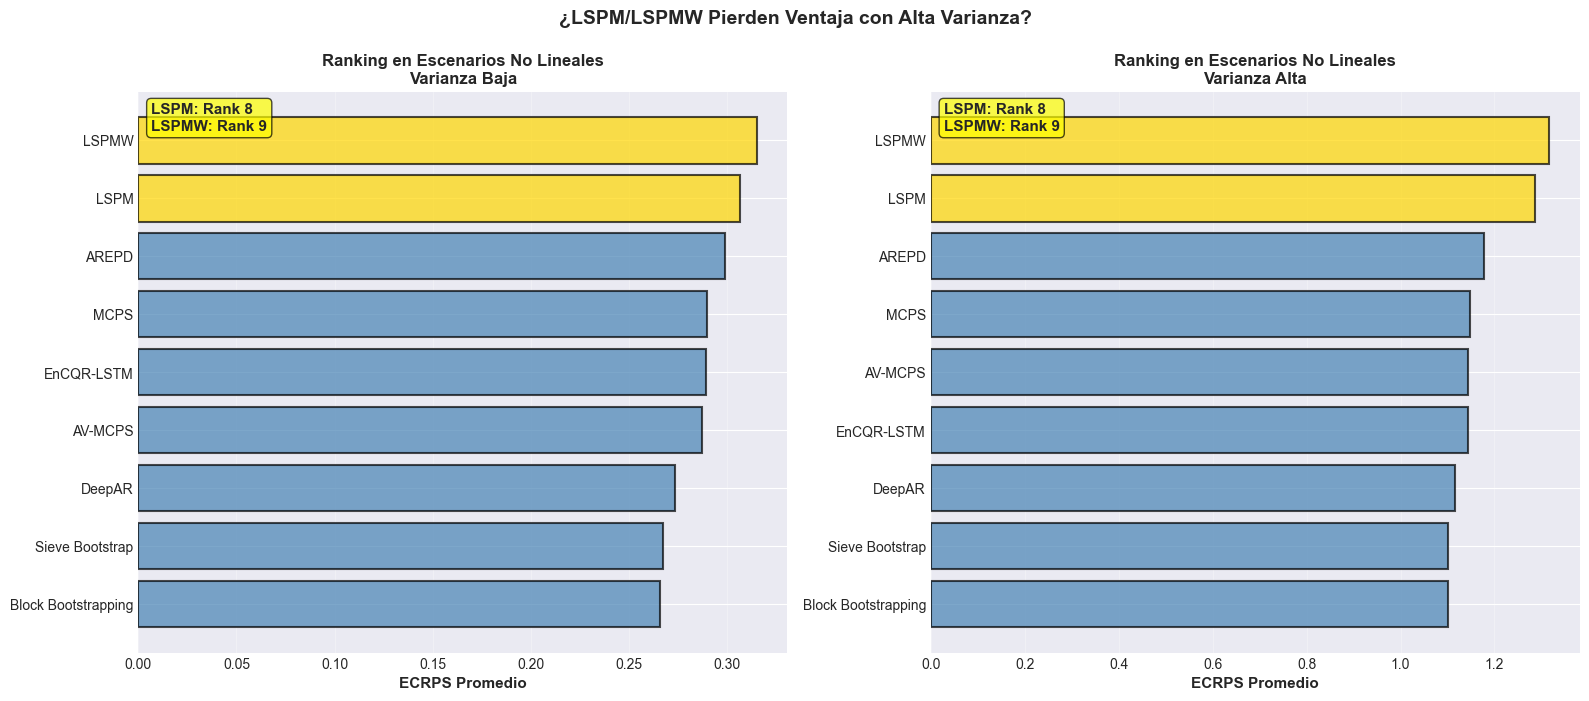

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
from itertools import combinations
import math
import warnings

warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# CONFIGURACIÓN GLOBAL
# ============================================================================

RUTA_DATOS = "./Datos/datos_combinados.xlsx"
DIR_SALIDA = "./resultados_preguntas_profundizacion"

MODELOS = ['AREPD', 'AV-MCPS', 'Block Bootstrapping', 'DeepAR',
           'EnCQR-LSTM', 'LSPM', 'LSPMW', 'MCPS', 'Sieve Bootstrap']

COLORES_MODELOS = {
    'AREPD': '#e41a1c',
    'AV-MCPS': '#377eb8',
    'Block Bootstrapping': '#4daf4a',
    'DeepAR': '#984ea3',
    'EnCQR-LSTM': '#ff7f00',
    'LSPM': '#ffff33',
    'LSPMW': '#a65628',
    'MCPS': '#f781bf',
    'Sieve Bootstrap': '#999999'
}


# ============================================================================
# CLASE PRINCIPAL DE ANÁLISIS - PREGUNTAS DE PROFUNDIZACIÓN
# ============================================================================

class AnalizadorPreguntasProfundizacion:
    """Análisis específico para responder preguntas de profundización"""

    def __init__(self, ruta_datos):
        """Inicializa el analizador"""
        print("\n" + "=" * 80)
        print("ANÁLISIS DE PREGUNTAS DE PROFUNDIZACIÓN")
        print("=" * 80 + "\n")

        self.df = pd.read_excel(ruta_datos)
        self.modelos = MODELOS
        self.COLORES_MODELOS = COLORES_MODELOS
        self.dir_salida = Path(DIR_SALIDA)
        self.dir_salida.mkdir(parents=True, exist_ok=True)

        # Extraer características del escenario
        self._extraer_caracteristicas()

        print(f"✓ Datos cargados: {self.df.shape[0]} filas, {self.df.shape[1]} columnas")
        print(f"✓ Modelos a analizar: {len(self.modelos)}")
        print(f"✓ Directorio de salida: {self.dir_salida}")
        print("\n" + "=" * 80 + "\n")

    def _extraer_caracteristicas(self):
        """Extrae características individuales del escenario"""
        self.df['Estacionario'] = self.df['Escenario'].apply(
            lambda x: 'Estacionario' if 'Estacionario' in x and 'No_Estacionario' not in x else 'No Estacionario'
        )

        self.df['Lineal'] = self.df['Escenario'].apply(
            lambda x: 'Lineal' if 'Lineal' in x and 'No_Lineal' not in x else 'No Lineal'
        )

    def ejecutar_analisis_completo(self):
        """Ejecuta todos los análisis para las preguntas"""
        print("\n" + "🔬" * 40 + "\n")

        # Pregunta 1: Punto de quiebre de AREPD
        print("1️⃣  Pregunta 1: Punto de quiebre de AREPD...")
        self._pregunta_1_punto_quiebre_arepd()

        # Pregunta 2: Robustez de Block Bootstrapping vs Sieve Bootstrap
        print("\n2️⃣  Pregunta 2: Zona de dominio Block Bootstrapping...")
        self._pregunta_2_zona_dominio_bb()

        # Pregunta 3: Deterioro acelerado AV-MCPS
        print("\n3️⃣  Pregunta 3: Deterioro de AV-MCPS por horizonte...")
        self._pregunta_3_deterioro_av_mcps()

        # Pregunta 4: Penalización Normal multiplicativa
        print("\n4️⃣  Pregunta 4: Efecto multiplicativo distribución Normal...")
        self._pregunta_4_penalizacion_normal()

        # Pregunta 5: Frontera de colapso Deep Learning
        print("\n5️⃣  Pregunta 5: Frontera de colapso Deep Learning...")
        self._pregunta_5_frontera_dl()

        # Pregunta 6: Consistencia "Mejor Modelo"
        print("\n6️⃣  Pregunta 6: Validación de 'Mejor Modelo'...")
        self._pregunta_6_consistencia_mejor_modelo()

        # Pregunta 7: Análisis de segunda derivada
        print("\n7️⃣  Pregunta 7: Aceleración del deterioro...")
        self._pregunta_7_segunda_derivada()

        # Pregunta 8: Interacción No Linealidad × Varianza
        print("\n8️⃣  Pregunta 8: Colapso LSPM con varianza alta...")
        self._pregunta_8_interaccion_nolineal_varianza()

        # Pregunta 9: Mapa de decisión operacional
        print("\n9️⃣  Pregunta 9: Mapa de decisión operacional...")
        self._pregunta_9_mapa_decision()

        print("\n" + "=" * 80)
        print("✅ ANÁLISIS DE PREGUNTAS COMPLETO")
        print(f"📁 Resultados guardados en: {self.dir_salida}")
        print("=" * 80 + "\n")

    # ========================================================================
    # PREGUNTA 1: PUNTO DE QUIEBRE DE AREPD
    # ========================================================================

    def _pregunta_1_punto_quiebre_arepd(self):
        """
        ¿Existe un punto de quiebre en la varianza del error donde AREPD se deteriora?
        ¿Este punto es consistente entre todas las distribuciones presentes?
        """
        
        # --- MODIFICACIÓN: Detectar todas las distribuciones únicas automáticamente ---
        distribuciones = self.df['Distribución'].unique()
        varianzas = sorted(self.df['Varianza error'].unique())
        
        # Diccionario para almacenar los resultados de cada distribución
        resultados_por_dist = {dist: {'arepd': [], 'otros_robustos': []} for dist in distribuciones}
        
        # Modelos robustos para comparación
        otros_modelos = ['Block Bootstrapping', 'Sieve Bootstrap', 'LSPM']
        
        # Calcular el rendimiento promedio para cada distribución y varianza
        for dist in distribuciones:
            df_dist = self.df[self.df['Distribución'] == dist]
            for var in varianzas:
                df_var = df_dist[df_dist['Varianza error'] == var]
                
                # Rendimiento de AREPD
                resultados_por_dist[dist]['arepd'].append(df_var['AREPD'].mean())
                
                # Rendimiento promedio de otros modelos robustos
                resultados_por_dist[dist]['otros_robustos'].append(df_var[otros_modelos].mean().mean())

        # --- MODIFICACIÓN: Gráfico dinámico para N distribuciones ---
        # FIGURA 1.1: Evolución de AREPD vs modelos robustos por distribución
        n_dist = len(distribuciones)
        n_cols = 2
        n_rows = math.ceil(n_dist / n_cols)
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 6 * n_rows), squeeze=False)
        axes = axes.flatten()

        for idx, dist in enumerate(distribuciones):
            ax = axes[idx]
            arepd_perf = resultados_por_dist[dist]['arepd']
            otros_perf = resultados_por_dist[dist]['otros_robustos']
            
            ax.plot(varianzas, arepd_perf, 'o-', label='AREPD', 
                    color=self.COLORES_MODELOS.get('AREPD', 'blue'), linewidth=3, markersize=8)
            ax.plot(varianzas, otros_perf, 's--', label='Promedio Modelos Robustos',
                    color='green', linewidth=2, markersize=7, alpha=0.7)
            
            ax.set_xlabel('Varianza del Error', fontweight='bold', fontsize=12)
            ax.set_ylabel('ECRPS Promedio', fontweight='bold', fontsize=12)
            ax.set_title(f'Distribución {dist.capitalize()}: Punto de Quiebre AREPD', 
                         fontweight='bold', fontsize=13)
            ax.legend(fontsize=11)
            ax.grid(True, alpha=0.3)
        
        # Ocultar ejes no utilizados si el número de distribuciones es impar
        for idx in range(n_dist, len(axes)):
            axes[idx].axis('off')

        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P1_1_punto_quiebre_arepd_comparativo.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # --- MODIFICACIÓN: Gráfico de comparación de tasas con N distribuciones ---
        # FIGURA 1.2: Tasa de deterioro incremental
        fig, ax = plt.subplots(figsize=(14, 8))
        
        # Usar un ciclo de colores de Matplotlib para distinguir las líneas
        colors = plt.cm.viridis(np.linspace(0, 1, n_dist))
        var_medias = [(varianzas[i] + varianzas[i+1]) / 2 for i in range(len(varianzas) - 1)]
        
        puntos_quiebre = {}

        for idx, dist in enumerate(distribuciones):
            arepd_perf = resultados_por_dist[dist]['arepd']
            
            # Calcular tasas de cambio (derivada numérica)
            if len(varianzas) > 1 and np.diff(varianzas).any():
                tasas = np.diff(arepd_perf) / np.diff(varianzas)
            else:
                tasas = []

            if len(tasas) > 0:
                ax.plot(var_medias, tasas, 'o-', label=f'{dist.capitalize()}', 
                       color=colors[idx], linewidth=2.5, markersize=8)
                
                # Identificar y almacenar el punto de máxima aceleración del deterioro
                max_accel_idx = np.argmax(tasas)
                puntos_quiebre[dist] = var_medias[max_accel_idx]
            else:
                puntos_quiebre[dist] = None


        ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
        ax.set_xlabel('Varianza del Error (punto medio)', fontweight='bold', fontsize=12)
        ax.set_ylabel('Tasa de Deterioro (ΔECRPS/ΔVarianza)', fontweight='bold', fontsize=12)
        ax.set_title('AREPD: Aceleración del Deterioro por Distribución\n(Mayor pendiente = Colapso más rápido)',
                    fontweight='bold', fontsize=14, pad=20)
        ax.legend(fontsize=12, loc='upper left', title='Distribuciones')
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P1_2_tasa_deterioro_arepd.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # --- MODIFICACIÓN: Imprimir resultados para todas las distribuciones ---
        print("--- Análisis de Punto de Quiebre para AREPD ---")
        for dist, umbral in puntos_quiebre.items():
            if umbral is not None:
                print(f"   ✓ Punto de quiebre AREPD ({dist.capitalize()}): Varianza ≈ {umbral:.3f}")
            else:
                print(f"   ! No se pudo calcular el punto de quiebre para {dist.capitalize()}.")
        
        print("   ✓ 2 figuras generadas\n")

    # ========================================================================
    # PREGUNTA 2: ZONA DE DOMINIO BLOCK BOOTSTRAPPING
    # ========================================================================

    def _pregunta_2_zona_dominio_bb(self):
        """
        ¿En qué condiciones EXACTAS Block Bootstrapping supera a Sieve Bootstrap?
        """
        
        # Crear DataFrame de comparación directa
        df_comp = self.df.copy()
        df_comp['BB_mejor'] = df_comp['Block Bootstrapping'] < df_comp['Sieve Bootstrap']
        df_comp['Diferencia'] = df_comp['Sieve Bootstrap'] - df_comp['Block Bootstrapping']
        
        # FIGURA 2.1: Mapa de calor de superioridad
        # >>> INICIO DE MODIFICACIÓN 1 <<<
        fig, axes = plt.subplots(1, 3, figsize=(24, 7))
        axes = axes.flatten()
        
        escenarios_principales = [
            ('Estacionario', 'Lineal'),
            ('Estacionario', 'No Lineal'),
            ('No Estacionario', 'Lineal')
        ]
        # >>> FIN DE MODIFICACIÓN 1 <<<
        
        for idx, (est, lin) in enumerate(escenarios_principales):
            ax = axes[idx]
            df_esc = df_comp[(df_comp['Estacionario'] == est) & (df_comp['Lineal'] == lin)]
            
            # Crear matriz de diferencias
            pivot = df_esc.pivot_table(
                values='Diferencia',
                index='Distribución',
                columns='Varianza error',
                aggfunc='mean'
            )
            
            sns.heatmap(pivot, annot=True, fmt='.4f', cmap='RdYlGn', center=0,
                       ax=ax, cbar_kws={'label': 'SB - BB (>0 = BB mejor)'},
                       linewidths=1, linecolor='gray', vmin=-0.02, vmax=0.02)
            ax.set_title(f'{est} + {lin}', fontweight='bold', fontsize=12)
            ax.set_xlabel('Varianza Error', fontweight='bold')
            ax.set_ylabel('Distribución', fontweight='bold')
        
        plt.suptitle('Zona de Dominio: Block Bootstrapping vs Sieve Bootstrap\n(Verde = BB domina, Rojo = SB domina)',
                    fontweight='bold', fontsize=16, y=1.03)
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P2_1_zona_dominio_bb_heatmap.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # FIGURA 2.2: Frecuencia de dominio por condiciones
        fig, ax = plt.subplots(figsize=(14, 8))
        
        # Calcular % de casos donde BB es mejor
        resultados_dominio = []
        # >>> INICIO DE MODIFICACIÓN 1 (cont.) <<<
        # Se usan los mismos 3 escenarios definidos para la figura 2.1
        for est, lin in escenarios_principales:
            df_esc = df_comp[(df_comp['Estacionario'] == est) & (df_comp['Lineal'] == lin)]
            pct_bb_mejor = (df_esc['BB_mejor'].sum() / len(df_esc) * 100) if len(df_esc) > 0 else 0
            resultados_dominio.append({
                'Escenario': f'{est[:3]}+{lin[:3]}',
                'Completo': f'{est} + {lin}',
                'Pct_BB_Mejor': pct_bb_mejor
            })
        # >>> FIN DE MODIFICACIÓN 1 (cont.) <<<
        
        df_dominio = pd.DataFrame(resultados_dominio).sort_values('Pct_BB_Mejor', ascending=False)
        
        colors = ['green' if x > 50 else 'red' for x in df_dominio['Pct_BB_Mejor']]
        bars = ax.barh(df_dominio['Escenario'], df_dominio['Pct_BB_Mejor'],
                      color=colors, alpha=0.7, edgecolor='black', linewidth=2)
        ax.axvline(50, color='black', linestyle='--', linewidth=2, label='50% (Equilibrio)')
        ax.set_xlabel('% de casos donde BB supera a SB', fontweight='bold', fontsize=12)
        ax.set_title('Frecuencia de Dominio de Block Bootstrapping\n(>50% = BB generalmente mejor)',
                    fontweight='bold', fontsize=14, pad=20)
        ax.legend(fontsize=11)
        ax.grid(True, alpha=0.3, axis='x')
        ax.set_xlim(0, 100)
        
        for i, (bar, val) in enumerate(zip(bars, df_dominio['Pct_BB_Mejor'])):
            ax.text(val + 2, i, f'{val:.1f}%', va='center', fontweight='bold', fontsize=11)
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P2_2_frecuencia_dominio_bb.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"   ✓ BB domina en: {df_comp['BB_mejor'].sum()} / {len(df_comp)} casos ({df_comp['BB_mejor'].sum()/len(df_comp)*100:.1f}%)")
        print("   ✓ 2 figuras generadas\n")

    # ========================================================================
    # PREGUNTA 3: DETERIORO AV-MCPS POR HORIZONTE
    # ========================================================================

    def _pregunta_3_deterioro_av_mcps(self):
        """
        ¿El deterioro de AV-MCPS es lineal, cuadrático o exponencial?
        ¿Cambia según el nivel de varianza?
        """
        
        pasos = sorted(self.df['Paso'].unique())
        varianzas = sorted(self.df['Varianza error'].unique())
        
        # FIGURA 3.1: Ajuste de curvas de deterioro
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()
        
        # Seleccionar niveles de varianza representativos
        if len(varianzas) >= 4:
            var_seleccionadas = [varianzas[0], varianzas[len(varianzas)//3], 
                                varianzas[2*len(varianzas)//3], varianzas[-1]]
        else:
            var_seleccionadas = varianzas
        
        modelos_comparacion = ['AV-MCPS', 'LSPM', 'Block Bootstrapping']
        
        for idx, var in enumerate(var_seleccionadas[:4]):
            ax = axes[idx]
            df_var = self.df[self.df['Varianza error'] == var]
            
            for modelo in modelos_comparacion:
                valores = [df_var[df_var['Paso'] == p][modelo].mean() for p in pasos]
                ax.plot(pasos, valores, 'o-', label=modelo, 
                       linewidth=2.5, markersize=8, color=COLORES_MODELOS[modelo])
            
            ax.set_xlabel('Horizonte (Paso)', fontweight='bold', fontsize=11)
            ax.set_ylabel('ECRPS', fontweight='bold', fontsize=11)
            ax.set_title(f'Varianza = {var:.3f}', fontweight='bold', fontsize=12)
            ax.legend(fontsize=10)
            ax.grid(True, alpha=0.3)
        
        plt.suptitle('Evolución del Deterioro por Horizonte: AV-MCPS vs Modelos Estables',
                    fontweight='bold', fontsize=14, y=0.995)
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P3_1_deterioro_av_mcps_curvas.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # FIGURA 3.2: Análisis de tipo de crecimiento
        fig, ax = plt.subplots(figsize=(14, 8))
        
        # Calcular R² para diferentes tipos de ajuste
        tipos_ajuste = []
        
        for var in varianzas:
            df_var = self.df[self.df['Varianza error'] == var]
            valores_av = [df_var[df_var['Paso'] == p]['AV-MCPS'].mean() for p in pasos]
            
            x = np.array(pasos)
            y = np.array(valores_av)
            
            # Ajuste lineal
            p_lin = np.polyfit(x, y, 1)
            y_lin = np.polyval(p_lin, x)
            r2_lin = 1 - (np.sum((y - y_lin)**2) / np.sum((y - np.mean(y))**2))
            
            # Ajuste cuadrático
            p_quad = np.polyfit(x, y, 2)
            y_quad = np.polyval(p_quad, x)
            r2_quad = 1 - (np.sum((y - y_quad)**2) / np.sum((y - np.mean(y))**2))
            
            # Ajuste exponencial (logarítmico)
            try:
                z = np.polyfit(x, np.log(y + 1e-10), 1)
                y_exp = np.exp(np.polyval(z, x))
                r2_exp = 1 - (np.sum((y - y_exp)**2) / np.sum((y - np.mean(y))**2))
            except:
                r2_exp = 0
            
            mejor_ajuste = max([('Lineal', r2_lin), ('Cuadrático', r2_quad), ('Exponencial', r2_exp)], 
                              key=lambda x: x[1])
            
            tipos_ajuste.append({
                'Varianza': var,
                'R2_Lineal': r2_lin,
                'R2_Cuadratico': r2_quad,
                'R2_Exponencial': r2_exp,
                'Mejor': mejor_ajuste[0]
            })
        
        df_ajustes = pd.DataFrame(tipos_ajuste)
        
        x_pos = np.arange(len(varianzas))
        width = 0.25
        
        ax.bar(x_pos - width, df_ajustes['R2_Lineal'], width, label='Lineal', alpha=0.8)
        ax.bar(x_pos, df_ajustes['R2_Cuadratico'], width, label='Cuadrático', alpha=0.8)
        ax.bar(x_pos + width, df_ajustes['R2_Exponencial'], width, label='Exponencial', alpha=0.8)
        
        ax.set_xlabel('Varianza del Error', fontweight='bold', fontsize=12)
        ax.set_ylabel('R² (Bondad de Ajuste)', fontweight='bold', fontsize=12)
        ax.set_title('AV-MCPS: Tipo de Deterioro por Nivel de Varianza\n(R² más alto = Mejor ajuste)',
                    fontweight='bold', fontsize=14, pad=20)
        ax.set_xticks(x_pos)
        ax.set_xticklabels([f'{v:.3f}' for v in varianzas], rotation=45)
        ax.legend(fontsize=11)
        ax.grid(True, alpha=0.3, axis='y')
        ax.set_ylim(0, 1.1)
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P3_2_tipo_deterioro_av_mcps.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"   ✓ Tipo de deterioro predominante: {df_ajustes['Mejor'].mode()[0]}")
        print("   ✓ 2 figuras generadas\n")

    # ========================================================================
    # PREGUNTA 4: PENALIZACIÓN NORMAL MULTIPLICATIVA
    # ========================================================================
    def _pregunta_4_penalizacion_normal(self):
        """
        ¿La penalización de la distribución Normal es aditiva o multiplicativa 
        con la no-estacionariedad?
        """
        
        # --- CORRECCIÓN: Se definen los nombres reales de los escenarios del Excel ---
        # Se usan estos nombres para filtrar el DataFrame correctamente.
        escenario_estacionario = 'Estacionario_Lineal'
        escenario_no_estacionario = 'No_Estacionario_Lineal'
        
        # Modelos a analizar
        modelos_analisis = ['DeepAR', 'MCPS', 'LSPM', 'Block Bootstrapping']
        
        # FIGURA 4.1: Efecto aditivo vs multiplicativo
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()
        
        resultados_interaccion = []
        
        for idx, modelo in enumerate(modelos_analisis):
            ax = axes[idx]
            
            # Calcular penalización por escenario
            penalizaciones = []
            
            # --- CORRECCIÓN: Se itera sobre los escenarios correctos y se usan etiquetas limpias para los gráficos ---
            escenarios_a_comparar = {
                'Estacionario': escenario_estacionario,
                'No Estacionario': escenario_no_estacionario
            }
            
            for etiqueta, nombre_escenario in escenarios_a_comparar.items():
                
                # --- CORRECCIÓN: Filtrar por la columna 'Escenario' con los nombres correctos ---
                df_escenario = self.df[self.df['Escenario'] == nombre_escenario]
                
                # --- CORRECCIÓN: Usar 'normal' y 'mixture' en minúsculas ---
                rend_normal = df_escenario[df_escenario['Distribución'] == 'normal'][modelo].mean()
                rend_mixture = df_escenario[df_escenario['Distribución'] == 'mixture'][modelo].mean()
                
                # Calcular el deterioro porcentual. Se añade una guarda contra la división por cero.
                if rend_mixture != 0:
                    deterioro = ((rend_normal - rend_mixture) / rend_mixture) * 100
                else:
                    deterioro = 0.0 # O float('inf') si se prefiere, pero 0 es más seguro para graficar
                
                penalizaciones.append({
                    'Estacionariedad': etiqueta, # Usar la etiqueta limpia para el gráfico
                    'Deterioro_pct': deterioro
                })
            
            df_pen = pd.DataFrame(penalizaciones)
            
            # Calcular razón de efectos
            det_estacionario = df_pen[df_pen['Estacionariedad'] == 'Estacionario']['Deterioro_pct'].values[0]
            det_no_estacionario = df_pen[df_pen['Estacionariedad'] == 'No Estacionario']['Deterioro_pct'].values[0]
            
            # Evitar división por cero si el deterioro en el caso estacionario fue nulo
            razon = det_no_estacionario / det_estacionario if det_estacionario != 0 else 0
            es_multiplicativo = razon > 1.5  # Si el efecto es >50% mayor, se considera multiplicativo
            
            resultados_interaccion.append({
                'Modelo': modelo,
                'Razon': razon,
                'Tipo': 'Multiplicativo' if es_multiplicativo else 'Aditivo'
            })
            
            # Visualización
            colors = ['lightblue', 'coral']
            bars = ax.bar(df_pen['Estacionariedad'], df_pen['Deterioro_pct'], 
                         color=colors, alpha=0.7, edgecolor='black', linewidth=2)
            ax.set_ylabel('Deterioro por Dist. Normal (%)', fontweight='bold', fontsize=11)
            ax.set_title(f'{modelo}\nRazón: {razon:.2f}x ({("MULTIPLICATIVO" if es_multiplicativo else "ADITIVO")})',
                        fontweight='bold', fontsize=12)
            ax.grid(True, alpha=0.3, axis='y')
            ax.axhline(0, color='black', linestyle='-', linewidth=1)
            
            for bar, val in zip(bars, df_pen['Deterioro_pct']):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width() / 2., height + 1,
                       f'{val:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)
        
        plt.suptitle('Interacción: Distribución Normal × No-Estacionariedad\n(Razón > 1.5 = Efecto Multiplicativo)',
                    fontweight='bold', fontsize=14, y=0.995)
        
        # >>> INICIO DE MODIFICACIÓN 2 <<<
        # Se añade más padding para evitar que los elementos se superpongan
        plt.tight_layout(pad=3.0)
        # >>> FIN DE MODIFICACIÓN 2 <<<
        
        plt.savefig(self.dir_salida / 'P4_1_penalizacion_normal_interaccion.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # FIGURA 4.2: Resumen de tipos de interacción
        fig, ax = plt.subplots(figsize=(12, 8))
        
        df_interaccion = pd.DataFrame(resultados_interaccion).sort_values('Razon', ascending=False)
        
        colors_tipo = ['red' if x == 'Multiplicativo' else 'green' for x in df_interaccion['Tipo']]
        bars = ax.barh(df_interaccion['Modelo'], df_interaccion['Razon'],
                      color=colors_tipo, alpha=0.7, edgecolor='black', linewidth=2)
        ax.axvline(1.5, color='black', linestyle='--', linewidth=2, label='Umbral Multiplicativo (1.5x)')
        ax.axvline(1.0, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)
        ax.set_xlabel('Razón de Efectos (No-Est / Est)', fontweight='bold', fontsize=12)
        ax.set_title('Clasificación del Tipo de Interacción por Modelo\n(Rojo = Multiplicativo, Verde = Aditivo)',
                    fontweight='bold', fontsize=14, pad=20)
        ax.legend(fontsize=11)
        ax.grid(True, alpha=0.3, axis='x')
        
        for i, (bar, val, tipo) in enumerate(zip(bars, df_interaccion['Razon'], df_interaccion['Tipo'])):
            ax.text(val + 0.05, i, f'{val:.2f}x ({tipo})', 
                   va='center', fontweight='bold', fontsize=10)
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P4_2_clasificacion_interaccion.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        modelos_multiplicativos = df_interaccion[df_interaccion['Tipo'] == 'Multiplicativo']['Modelo'].tolist()
        print(f"   ✓ Modelos con efecto multiplicativo: {modelos_multiplicativos}")
        print("   ✓ 2 figuras generadas\n")

    # ========================================================================
    # PREGUNTA 5: FRONTERA DE COLAPSO DEEP LEARNING
    # ========================================================================

    def _pregunta_5_frontera_dl(self):
        """
        ¿Existe una 'frontera de colapso' para DeepAR y EnCQR-LSTM donde su 
        rendimiento cae por debajo de métodos estadísticos simples?
        """
        
        modelos_dl = ['DeepAR', 'EnCQR-LSTM']
        modelos_estadisticos = ['Block Bootstrapping', 'Sieve Bootstrap', 'LSPM']
        
        varianzas = sorted(self.df['Varianza error'].unique())
        
        # FIGURA 5.1: Evolución comparativa con varianza
        fig, axes = plt.subplots(1, 2, figsize=(16, 7))
        
        for idx, modelo_dl in enumerate(modelos_dl):
            ax = axes[idx]
            
            # Calcular promedios por varianza
            dl_vals = [self.df[self.df['Varianza error'] == v][modelo_dl].mean() for v in varianzas]
            
            # Promedio de modelos estadísticos
            est_vals = []
            for v in varianzas:
                df_v = self.df[self.df['Varianza error'] == v]
                est_vals.append(df_v[modelos_estadisticos].mean().mean())
            
            # Plotear
            ax.plot(varianzas, dl_vals, 'o-', label=f'{modelo_dl} (DL)',
                   color=COLORES_MODELOS[modelo_dl], linewidth=3, markersize=10)
            ax.plot(varianzas, est_vals, 's--', label='Promedio Estadísticos',
                   color='green', linewidth=2.5, markersize=8, alpha=0.7)
            
            # Identificar punto de cruce
            diferencias = np.array(dl_vals) - np.array(est_vals)
            if np.any(diferencias > 0):
                idx_cruce_candidatos = np.where(diferencias > 0)[0]
                if len(idx_cruce_candidatos) > 0:
                    idx_cruce = idx_cruce_candidatos[0]
                    var_cruce = varianzas[idx_cruce]
                    ax.axvline(var_cruce, color='red', linestyle=':', linewidth=2, alpha=0.7)
                    ax.annotate(f'Frontera de colapso\nVarianza ≈ {var_cruce:.3f}',
                               xy=(var_cruce, dl_vals[idx_cruce]),
                               xytext=(20, -30), textcoords='offset points',
                               bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
                               arrowprops=dict(arrowstyle='->', color='red', lw=2),
                               fontsize=10, fontweight='bold')
            
            ax.set_xlabel('Varianza del Error', fontweight='bold', fontsize=12)
            ax.set_ylabel('ECRPS Promedio', fontweight='bold', fontsize=12)
            ax.set_title(f'Frontera de Colapso: {modelo_dl}',
                        fontweight='bold', fontsize=13)
            ax.legend(fontsize=11)
            ax.grid(True, alpha=0.3)
        
        plt.suptitle('Identificación de Frontera donde Deep Learning < Métodos Estadísticos',
                    fontweight='bold', fontsize=14, y=0.995)
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P5_1_frontera_colapso_dl.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # FIGURA 5.2: Brecha de rendimiento por escenario
        # >>> INICIO DE MODIFICACIÓN 3 <<<
        fig, ax = plt.subplots(figsize=(16, 9)) # Ajustar tamaño para mejor visualización
        
        escenarios_unicos = self.df['Escenario'].unique()
        
        brechas = []
        for esc in escenarios_unicos:
            df_esc = self.df[self.df['Escenario'] == esc]
            
            for modelo_dl in modelos_dl:
                dl_mean = df_esc[modelo_dl].mean()
                est_mean = df_esc[modelos_estadisticos].mean().mean()
                
                brecha_pct = ((dl_mean - est_mean) / est_mean) * 100
                
                brechas.append({
                    'Escenario': esc.replace("_", " "), # Nombres más legibles
                    'Modelo_DL': modelo_dl,
                    'Brecha_pct': brecha_pct
                })
        
        df_brechas = pd.DataFrame(brechas)
        
        # Pivot para visualización
        pivot_brechas = df_brechas.pivot(index='Escenario', columns='Modelo_DL', values='Brecha_pct')
        pivot_brechas = pivot_brechas.sort_values(by='DeepAR', ascending=False)
        
        x = np.arange(len(pivot_brechas))
        width = 0.35
        
        # Se cambia barh por bar para un gráfico vertical
        ax.bar(x - width/2, pivot_brechas['DeepAR'], width, 
               label='DeepAR', color=COLORES_MODELOS['DeepAR'], alpha=0.8, edgecolor='black')
        ax.bar(x + width/2, pivot_brechas['EnCQR-LSTM'], width,
               label='EnCQR-LSTM', color=COLORES_MODELOS['EnCQR-LSTM'], alpha=0.8, edgecolor='black')
        
        # Se cambia axvline por axhline
        ax.axhline(0, color='black', linestyle='-', linewidth=2)
        ax.axhline(50, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Umbral Crítico (+50%)')
        
        # Se configuran los ejes para el gráfico vertical
        ax.set_xticks(x)
        ax.set_xticklabels(pivot_brechas.index, rotation=45, ha='right', fontsize=9)
        ax.set_ylabel('Brecha vs Métodos Estadísticos (%)', fontweight='bold', fontsize=12)
        ax.set_xlabel('Escenario', fontweight='bold', fontsize=12)
        ax.set_title('Escenarios donde Deep Learning Colapsa\n(>0% = DL peor que Estadísticos)',
                    fontweight='bold', fontsize=14, pad=20)
        ax.legend(fontsize=11, loc='upper right')
        ax.grid(True, alpha=0.3, axis='y') # Grid en el eje Y
        # >>> FIN DE MODIFICACIÓN 3 <<<
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P5_2_brecha_dl_por_escenario.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"   ✓ Escenarios críticos identificados: {len(pivot_brechas[pivot_brechas['DeepAR'] > 50])}")
        print("   ✓ 2 figuras generadas\n")

    # ========================================================================
    # PREGUNTA 6: CONSISTENCIA "MEJOR MODELO"
    # ========================================================================

    def _pregunta_6_consistencia_mejor_modelo(self):
        """
        ¿Con qué frecuencia el modelo marcado como 'Mejor Modelo' coincide con el 
        que REALMENTE tiene el menor error numérico?
        """
        
        # Verificar si existe la columna "Mejor Modelo"
        if 'Mejor Modelo' not in self.df.columns:
            print("   ⚠️  Columna 'Mejor Modelo' no encontrada. Saltando análisis.\n")
            return
        
        # Identificar el modelo con menor error en cada fila
        self.df['Modelo_Min_Real'] = self.df[self.modelos].idxmin(axis=1)
        self.df['Coincide'] = self.df['Mejor Modelo'] == self.df['Modelo_Min_Real']
        
        # FIGURA 6.1: Tasa de coincidencia global
        fig, ax = plt.subplots(figsize=(10, 6))
        
        tasa_coincidencia = self.df['Coincide'].mean() * 100
        
        labels = ['Coincide', 'No Coincide']
        sizes = [tasa_coincidencia, 100 - tasa_coincidencia]
        colors = ['#4CAF50', '#F44336']
        explode = (0.1, 0)
        
        ax.pie(sizes, explode=explode, labels=labels, colors=colors,
               autopct='%1.1f%%', shadow=True, startangle=90,
               textprops={'fontsize': 14, 'fontweight': 'bold'})
        ax.set_title('Consistencia de "Mejor Modelo" con Menor Error Real\n',
                    fontweight='bold', fontsize=14, pad=20)
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P6_1_consistencia_mejor_modelo_global.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # FIGURA 6.2: Coincidencia por escenario y distribución
        fig, axes = plt.subplots(1, 2, figsize=(16, 7))
        
        # Por Escenario
        ax1 = axes[0]
        coincidencia_esc = self.df.groupby('Escenario')['Coincide'].mean() * 100
        coincidencia_esc = coincidencia_esc.sort_values(ascending=True)
        
        colors_esc = ['green' if x > 70 else 'orange' if x > 50 else 'red' 
                      for x in coincidencia_esc.values]
        bars1 = ax1.barh(range(len(coincidencia_esc)), coincidencia_esc.values,
                        color=colors_esc, alpha=0.7, edgecolor='black', linewidth=1.5)
        ax1.set_yticks(range(len(coincidencia_esc)))
        ax1.set_yticklabels([x[:30] + '...' if len(x) > 30 else x for x in coincidencia_esc.index], 
                           fontsize=8)
        ax1.set_xlabel('% de Coincidencia', fontweight='bold', fontsize=11)
        ax1.set_title('Consistencia por Escenario', fontweight='bold', fontsize=12)
        ax1.axvline(70, color='green', linestyle='--', linewidth=1.5, alpha=0.5, label='Umbral Bueno (70%)')
        ax1.axvline(50, color='orange', linestyle='--', linewidth=1.5, alpha=0.5, label='Umbral Aceptable (50%)')
        ax1.legend(fontsize=9)
        ax1.grid(True, alpha=0.3, axis='x')
        
        # Por Distribución
        ax2 = axes[1]
        coincidencia_dist = self.df.groupby('Distribución')['Coincide'].mean() * 100
        coincidencia_dist = coincidencia_dist.sort_values(ascending=False)
        
        colors_dist = ['green' if x > 70 else 'orange' if x > 50 else 'red' 
                       for x in coincidencia_dist.values]
        bars2 = ax2.bar(range(len(coincidencia_dist)), coincidencia_dist.values,
                       color=colors_dist, alpha=0.7, edgecolor='black', linewidth=2)
        ax2.set_xticks(range(len(coincidencia_dist)))
        ax2.set_xticklabels(coincidencia_dist.index, rotation=45, ha='right')
        ax2.set_ylabel('% de Coincidencia', fontweight='bold', fontsize=11)
        ax2.set_title('Consistencia por Distribución', fontweight='bold', fontsize=12)
        ax2.axhline(70, color='green', linestyle='--', linewidth=1.5, alpha=0.5)
        ax2.axhline(50, color='orange', linestyle='--', linewidth=1.5, alpha=0.5)
        ax2.grid(True, alpha=0.3, axis='y')
        
        for bar, val in zip(bars2, coincidencia_dist.values):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{val:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)
        
        plt.suptitle('Análisis de Consistencia de "Mejor Modelo" por Condiciones',
                    fontweight='bold', fontsize=14, y=0.995)
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P6_2_consistencia_por_condiciones.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"   ✓ Tasa de coincidencia global: {tasa_coincidencia:.1f}%")
        print(f"   ✓ Distribución con mayor consistencia: {coincidencia_dist.idxmax()} ({coincidencia_dist.max():.1f}%)")
        print("   ✓ 2 figuras generadas\n")

    # ========================================================================
    # PREGUNTA 7: ANÁLISIS DE SEGUNDA DERIVADA
    # ========================================================================

    def _pregunta_7_segunda_derivada(self):
        """
        ¿Qué modelos muestran 'deterioro acelerado' (segunda derivada positiva) 
        vs 'deterioro constante' al aumentar Pasos?
        """
        
        pasos = sorted(self.df['Paso'].unique())
        
        if len(pasos) < 3:
            print("   ⚠️  Insuficientes pasos para análisis de segunda derivada. Saltando.\n")
            return
        
        # FIGURA 7.1: Aceleración del deterioro
        fig, ax = plt.subplots(figsize=(14, 8))
        
        aceleraciones = []
        
        for modelo in self.modelos:
            valores = [self.df[self.df['Paso'] == p][modelo].mean() for p in pasos]
            
            # Primera derivada (velocidad de cambio)
            primera_deriv = np.diff(valores)
            
            # Segunda derivada (aceleración)
            if len(primera_deriv) > 1:
                segunda_deriv = np.diff(primera_deriv)
                aceleracion_media = np.mean(segunda_deriv)
                
                # Clasificación
                if aceleracion_media > 0.001:
                    tipo = 'Acelerado'
                elif aceleracion_media < -0.001:
                    tipo = 'Desacelerado'
                else:
                    tipo = 'Constante'
                
                aceleraciones.append({
                    'Modelo': modelo,
                    'Aceleracion': aceleracion_media,
                    'Tipo': tipo
                })
        
        df_aceleraciones = pd.DataFrame(aceleraciones).sort_values('Aceleracion', ascending=False)
        
        # Colores según tipo
        color_map = {'Acelerado': 'red', 'Constante': 'orange', 'Desacelerado': 'green'}
        colors = [color_map[t] for t in df_aceleraciones['Tipo']]
        
        bars = ax.barh(df_aceleraciones['Modelo'], df_aceleraciones['Aceleracion'],
                      color=colors, alpha=0.7, edgecolor='black', linewidth=2)
        ax.axvline(0, color='black', linestyle='-', linewidth=2)
        ax.set_xlabel('Aceleración del Deterioro (Segunda Derivada)', fontweight='bold', fontsize=12)
        ax.set_title('Clasificación de Modelos por Aceleración del Deterioro\n(Rojo=Acelerado, Verde=Desacelerado, Naranja=Constante)',
                    fontweight='bold', fontsize=14, pad=20)
        ax.grid(True, alpha=0.3, axis='x')
        
        for i, (bar, val, tipo) in enumerate(zip(bars, df_aceleraciones['Aceleracion'], 
                                                  df_aceleraciones['Tipo'])):
            ax.text(val + (0.0001 if val > 0 else -0.0001), i, f'{val:.4f} ({tipo})',
                   va='center', ha='left' if val > 0 else 'right',
                   fontweight='bold', fontsize=9)
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P7_1_segunda_derivada_aceleracion.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # FIGURA 7.2: Comparación de primeras y segundas derivadas
        fig, axes = plt.subplots(2, 1, figsize=(14, 12))
        
        # >>> INICIO DE MODIFICACIÓN 4 <<<
        # Mapear cada modelo a su tipo de aceleración para el estilo de línea
        modelo_a_tipo = df_aceleraciones.set_index('Modelo')['Tipo'].to_dict()
        tipo_a_estilo = {'Acelerado': '-', 'Desacelerado': '--', 'Constante': ':'}

        # Primera derivada
        ax1 = axes[0]
        for modelo in self.modelos:
            valores = [self.df[self.df['Paso'] == p][modelo].mean() for p in pasos]
            primera_deriv = np.diff(valores)
            pasos_deriv = pasos[1:]
            
            tipo_modelo = modelo_a_tipo.get(modelo, 'Constante')
            linestyle = tipo_a_estilo[tipo_modelo]
            
            ax1.plot(pasos_deriv, primera_deriv, 'o-', label=modelo,
                    linewidth=2.5, markersize=8, color=COLORES_MODELOS[modelo],
                    linestyle=linestyle)
        
        ax1.axhline(0, color='black', linestyle=':', linewidth=1.5, alpha=0.5)
        ax1.set_xlabel('Paso', fontweight='bold', fontsize=11)
        ax1.set_ylabel('Primera Derivada (Velocidad)', fontweight='bold', fontsize=11)
        ax1.set_title('Velocidad de Deterioro por Paso\n(Acelerado:—, Desacelerado:--, Constante:..)',
                     fontweight='bold', fontsize=12)
        ax1.legend(fontsize=9, ncol=3) # Aumentar columnas para que quepan todos
        ax1.grid(True, alpha=0.3)
        
        # Segunda derivada
        ax2 = axes[1]
        for modelo in self.modelos:
            valores = [self.df[self.df['Paso'] == p][modelo].mean() for p in pasos]
            primera_deriv = np.diff(valores)
            
            if len(primera_deriv) > 1:
                segunda_deriv = np.diff(primera_deriv)
                pasos_deriv2 = pasos[2:]
                
                tipo_modelo = modelo_a_tipo.get(modelo, 'Constante')
                linestyle = tipo_a_estilo[tipo_modelo]
                
                ax2.plot(pasos_deriv2, segunda_deriv, 's-', label=modelo,
                        linewidth=2.5, markersize=8, color=COLORES_MODELOS[modelo],
                        linestyle=linestyle)
        
        ax2.axhline(0, color='black', linestyle=':', linewidth=1.5, alpha=0.5)
        ax2.set_xlabel('Paso', fontweight='bold', fontsize=11)
        ax2.set_ylabel('Segunda Derivada (Aceleración)', fontweight='bold', fontsize=11)
        ax2.set_title('Aceleración del Deterioro por Paso\n(Valores positivos = Deterioro acelerado)',
                     fontweight='bold', fontsize=12)
        ax2.legend(fontsize=9, ncol=3) # Aumentar columnas
        ax2.grid(True, alpha=0.3)
        # >>> FIN DE MODIFICACIÓN 4 <<<
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P7_2_comparacion_derivadas.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        modelos_vulnerables = df_aceleraciones[df_aceleraciones['Tipo'] == 'Acelerado']['Modelo'].tolist()
        modelos_robustos = df_aceleraciones[df_aceleraciones['Tipo'] == 'Desacelerado']['Modelo'].tolist()
        print(f"   ✓ Modelos con deterioro acelerado: {len(modelos_vulnerables)}")
        print(f"   ✓ Modelos con deterioro desacelerado: {len(modelos_robustos)}")
        print("   ✓ 2 figuras generadas\n")

    # ========================================================================
    # PREGUNTA 8: INTERACCIÓN NO LINEALIDAD × VARIANZA
    # ========================================================================

    def _pregunta_8_interaccion_nolineal_varianza(self):
        """
        ¿La ventaja de LSPM/LSPMW en escenarios no lineales DESAPARECE cuando 
        la varianza del error supera cierto umbral?
        """
        
        # Filtrar escenarios no lineales
        df_nolineal = self.df[self.df['Lineal'] == 'No Lineal'].copy()
        
        if df_nolineal.empty:
            print("   ⚠️  No hay datos para escenarios no lineales. Saltando análisis.\n")
            return
            
        varianzas = sorted(df_nolineal['Varianza error'].unique())
        
        # >>> INICIO DE MODIFICACIÓN 5 <<<
        # Se redefine el cálculo para hacer una comparación más clara entre los extremos
        # Se usa el primer cuartil (Q1) para "Varianza Baja" y el tercer cuartil (Q3) para "Varianza Alta"
        if len(varianzas) > 3:
            q1, q3 = np.percentile(varianzas, [25, 75])
            df_baja = df_nolineal[df_nolineal['Varianza error'] <= q1]
            df_alta = df_nolineal[df_nolineal['Varianza error'] >= q3]
        else: # Fallback para pocos datos
            q2 = np.percentile(varianzas, 50)
            df_baja = df_nolineal[df_nolineal['Varianza error'] <= q2]
            df_alta = df_nolineal[df_nolineal['Varianza error'] >= q2]

        grupos_dfs = {'Varianza Baja': df_baja, 'Varianza Alta': df_alta}
        # >>> FIN DE MODIFICACIÓN 5 <<<

        # FIGURA 8.1: Ranking por grupo de varianza
        fig, axes = plt.subplots(1, 2, figsize=(16, 7))
        
        for idx, (grupo, df_grupo) in enumerate(grupos_dfs.items()):
            ax = axes[idx]
            
            if df_grupo.empty:
                ax.text(0.5, 0.5, 'Sin datos', ha='center', va='center', fontsize=12)
                ax.set_title(f'Ranking en Escenarios No Lineales\n{grupo}', fontweight='bold', fontsize=12)
                continue

            # Calcular medias y ranking
            medias = df_grupo[self.modelos].mean().sort_values()
            
            colors = ['gold' if m in ['LSPM', 'LSPMW'] else 'steelblue' for m in medias.index]
            bars = ax.barh(range(len(medias)), medias.values, color=colors,
                          alpha=0.7, edgecolor='black', linewidth=1.5)
            
            ax.set_yticks(range(len(medias)))
            ax.set_yticklabels(medias.index, fontsize=10)
            ax.set_xlabel('ECRPS Promedio', fontweight='bold', fontsize=11)
            ax.set_title(f'Ranking en Escenarios No Lineales\n{grupo}',
                        fontweight='bold', fontsize=12)
            ax.grid(True, alpha=0.3, axis='x')
            
            # Destacar posición de LSPM/LSPMW
            pos_lspm = list(medias.index).index('LSPM') + 1
            pos_lspmw = list(medias.index).index('LSPMW') + 1
            
            ax.text(0.02, 0.98, f'LSPM: Rank {pos_lspm}\nLSPMW: Rank {pos_lspmw}',
                   transform=ax.transAxes, fontsize=11, fontweight='bold',
                   va='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
        
        plt.suptitle('¿LSPM/LSPMW Pierden Ventaja con Alta Varianza?',
                    fontweight='bold', fontsize=14, y=0.995)
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P8_1_interaccion_nolineal_varianza_ranking.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # FIGURA 8.2: Cambio de posición en ranking
        fig, ax = plt.subplots(figsize=(14, 8))
        
        cambios_ranking = []
        
        # >>> INICIO DE MODIFICACIÓN 5 (cont.) <<<
        # Se usan los dataframes df_baja y df_alta definidos previamente
        for modelo in self.modelos:
            if df_baja.empty or df_alta.empty: continue
            
            ranking_baja = df_baja[self.modelos].mean().rank().loc[modelo]
            ranking_alta = df_alta[self.modelos].mean().rank().loc[modelo]
            
            cambio = ranking_alta - ranking_baja  # Positivo = empeoró posición
            
            cambios_ranking.append({
                'Modelo': modelo,
                'Cambio': cambio,
                'Empeora': cambio > 0
            })
        # >>> FIN DE MODIFICACIÓN 5 (cont.) <<<

        if not cambios_ranking:
            print("   ⚠️  No se pudo generar el gráfico de cambio de ranking.\n")
            return

        df_cambios = pd.DataFrame(cambios_ranking).sort_values('Cambio', ascending=True)
        
        colors_cambio = ['red' if x > 2 else 'orange' if x > 0 else 'green' 
                        for x in df_cambios['Cambio']]
        bars = ax.barh(df_cambios['Modelo'], df_cambios['Cambio'],
                      color=colors_cambio, alpha=0.7, edgecolor='black', linewidth=2)
        ax.axvline(0, color='black', linestyle='-', linewidth=2)
        ax.axvline(3, color='red', linestyle='--', linewidth=1.5, alpha=0.5, 
                  label='Cambio Crítico (>3 posiciones)')
        ax.set_xlabel('Cambio en Ranking (Varianza Alta - Varianza Baja)', fontweight='bold', fontsize=12)
        ax.set_title('Deterioro de Posición con Alta Varianza en Escenarios No Lineales\n(Positivo = Pierde posiciones, Negativo = Gana posiciones)',
                    fontweight='bold', fontsize=14, pad=20)
        ax.legend(fontsize=11)
        ax.grid(True, alpha=0.3, axis='x')
        
        for i, (bar, val, modelo) in enumerate(zip(bars, df_cambios['Cambio'], df_cambios['Modelo'])):
            label_text = f'{val:+.1f}'
            if modelo in ['LSPM', 'LSPMW']:
                label_text += ' ⭐'
            ax.text(val + (0.1 if val > 0 else -0.1), i, label_text,
                   va='center', ha='left' if val > 0 else 'right',
                   fontweight='bold', fontsize=10)
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P8_2_cambio_ranking_lspm.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # Análisis específico de LSPM/LSPMW
        cambio_lspm = df_cambios[df_cambios['Modelo'] == 'LSPM']['Cambio'].values[0]
        cambio_lspmw = df_cambios[df_cambios['Modelo'] == 'LSPMW']['Cambio'].values[0]
        
        print(f"   ✓ Cambio de ranking LSPM: {cambio_lspm:+.1f} posiciones")
        print(f"   ✓ Cambio de ranking LSPMW: {cambio_lspmw:+.1f} posiciones")
        
        if cambio_lspm > 3 or cambio_lspmw > 3:
            print("   ⚠️  ADVERTENCIA: LSPM/LSPMW pierden >3 posiciones con alta varianza")
        else:
            print("   ✓ LSPM/LSPMW mantienen ventaja incluso con alta varianza")
        
        print("   ✓ 2 figuras generadas\n")

    # ========================================================================
    # PREGUNTA 9: MAPA DE DECISIÓN OPERACIONAL
    # ========================================================================

    def _pregunta_9_mapa_decision(self):
        """
        ¿Podemos construir una 'regla de decisión' simple para elegir modelo 
        basada en 3 variables: Estacionariedad, Distribución y Varianza?
        """
        
        # Crear categorías de varianza
        varianzas = sorted(self.df['Varianza error'].unique())
        q33, q67 = np.percentile(varianzas, [33, 67])
        
        self.df['Nivel_Varianza'] = pd.cut(
            self.df['Varianza error'],
            bins=[-np.inf, q33, q67, np.inf],
            labels=['Baja', 'Media', 'Alta']
        )
        
        # FIGURA 9.1: Árbol de decisión visual (heatmap 3D colapsado)
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        niveles_var = ['Baja', 'Media', 'Alta']
        estacionariedades = ['Estacionario', 'No Estacionario']
        
        for idx_est, est in enumerate(estacionariedades):
            for idx_var,niv_var in enumerate(niveles_var):
                ax = axes[idx_est, idx_var]
                
                # Filtrar datos
                df_filtrado = self.df[
                    (self.df['Estacionario'] == est) & 
                    (self.df['Nivel_Varianza'] == niv_var)
                ]
                
                if len(df_filtrado) == 0:
                    ax.text(0.5, 0.5, 'Sin datos', ha='center', va='center',
                           transform=ax.transAxes, fontsize=12)
                    ax.set_title(f'{est} + Varianza {niv_var}', fontweight='bold', fontsize=11)
                    continue
                
                # Calcular mejor modelo por distribución
                mejores_por_dist = {}
                for dist in df_filtrado['Distribución'].unique():
                    df_dist = df_filtrado[df_filtrado['Distribución'] == dist]
                    medias = df_dist[self.modelos].mean()
                    mejor = medias.idxmin()
                    mejores_por_dist[dist] = mejor
                
                # Crear matriz para heatmap
                distribuciones = sorted(df_filtrado['Distribución'].unique())
                matriz_decision = pd.DataFrame(index=distribuciones, columns=['Mejor Modelo'])
                
                for dist in distribuciones:
                    matriz_decision.loc[dist, 'Mejor Modelo'] = mejores_por_dist.get(dist, 'N/A')
                
                # Asignar colores por modelo
                modelo_a_color = {modelo: idx for idx, modelo in enumerate(self.modelos)}
                matriz_numerica = matriz_decision['Mejor Modelo'].map(
                    lambda x: modelo_a_color.get(x, -1)
                ).values.reshape(-1, 1)
                
                im = ax.imshow(matriz_numerica, cmap='tab10', aspect='auto', vmin=0, vmax=len(self.modelos)-1)
                
                # Configurar ejes
                ax.set_yticks(range(len(distribuciones)))
                ax.set_yticklabels(distribuciones, fontsize=9)
                ax.set_xticks([])
                ax.set_title(f'{est}\nVarianza {niv_var}', fontweight='bold', fontsize=11)
                
                # Añadir texto con nombre del modelo
                for i, dist in enumerate(distribuciones):
                    modelo = mejores_por_dist.get(dist, 'N/A')
                    ax.text(0, i, modelo, ha='center', va='center',
                           fontweight='bold', fontsize=9, color='white',
                           bbox=dict(boxstyle='round', facecolor='black', alpha=0.6))
        
        plt.suptitle('Mapa de Decisión Operacional: Mejor Modelo por Condiciones\n(Cada celda muestra el modelo óptimo)',
                    fontweight='bold', fontsize=14, y=0.995)
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P9_1_mapa_decision_operacional.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # FIGURA 9.2: Reglas de decisión simplificadas
        fig, ax = plt.subplots(figsize=(14, 10))
        
        # Calcular frecuencia de "mejor modelo" en cada combinación
        reglas = []
        
        for est in estacionariedades:
            for niv_var in niveles_var:
                df_comb = self.df[
                    (self.df['Estacionario'] == est) & 
                    (self.df['Nivel_Varianza'] == niv_var)
                ]
                
                if len(df_comb) == 0:
                    continue
                
                # Encontrar modelo con menor error promedio
                medias = df_comb[self.modelos].mean()
                mejor_modelo = medias.idxmin()
                mejor_ecrps = medias.min()
                
                # Calcular % de veces que es el mejor
                cuenta_mejor = 0
                for idx, row in df_comb.iterrows():
                    if row[self.modelos].idxmin() == mejor_modelo:
                        cuenta_mejor += 1
                
                frecuencia = (cuenta_mejor / len(df_comb)) * 100 if len(df_comb) > 0 else 0
                
                reglas.append({
                    'Condicion': f'{est[:3]}+Var_{niv_var}',
                    'Completo': f'{est} + Varianza {niv_var}',
                    'Mejor_Modelo': mejor_modelo,
                    'ECRPS': mejor_ecrps,
                    'Frecuencia': frecuencia
                })
        
        df_reglas = pd.DataFrame(reglas).sort_values('Frecuencia', ascending=True)
        
        # Visualización
        y_pos = np.arange(len(df_reglas))
        colors_reglas = [COLORES_MODELOS.get(m, 'gray') for m in df_reglas['Mejor_Modelo']]
        
        bars = ax.barh(y_pos, df_reglas['Frecuencia'], color=colors_reglas,
                      alpha=0.7, edgecolor='black', linewidth=1.5)
        
        ax.set_yticks(y_pos)
        ax.set_yticklabels(df_reglas['Condicion'], fontsize=10)
        ax.set_xlabel('Frecuencia de Optimalidad (%)', fontweight='bold', fontsize=12)
        ax.set_title('Confiabilidad de Reglas de Decisión\n(% de casos donde el modelo recomendado es óptimo)',
                    fontweight='bold', fontsize=14, pad=20)
        ax.axvline(70, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Umbral Alta Confianza (70%)')
        ax.legend(fontsize=11)
        ax.grid(True, alpha=0.3, axis='x')
        
        # Añadir etiquetas con modelo recomendado
        for i, (bar, modelo, freq) in enumerate(zip(bars, df_reglas['Mejor_Modelo'], 
                                                     df_reglas['Frecuencia'])):
            ax.text(freq + 2, i, f'{modelo} ({freq:.0f}%)',
                   va='center', fontweight='bold', fontsize=9)
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P9_2_confiabilidad_reglas.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # FIGURA 9.3: Árbol de decisión textual
        fig, ax = plt.subplots(figsize=(14, 10))
        ax.axis('off')
        
        # Generar reglas textuales
        texto_reglas = "ÁRBOL DE DECISIÓN OPERACIONAL\n" + "="*60 + "\n\n"
        
        for idx, row in df_reglas.iterrows():
            confianza = "ALTA" if row['Frecuencia'] > 70 else "MEDIA" if row['Frecuencia'] > 50 else "BAJA"
            texto_reglas += f"📌 SI: {row['Completo']}\n"
            texto_reglas += f"   → USAR: {row['Mejor_Modelo']}\n"
            texto_reglas += f"   → Confianza: {confianza} ({row['Frecuencia']:.1f}%)\n"
            texto_reglas += f"   → ECRPS esperado: {row['ECRPS']:.4f}\n\n"
        
        # Añadir reglas generales
        texto_reglas += "\n" + "="*60 + "\n"
        texto_reglas += "REGLAS GENERALES SIMPLIFICADAS:\n\n"
        
        # Mejor modelo global
        mejor_global = df_reglas.loc[df_reglas['ECRPS'].idxmin(), 'Mejor_Modelo']
        texto_reglas += f"🏆 Modelo más robusto (recomendación por defecto): {mejor_global}\n\n"
        
        # Modelos por características
        mejor_no_est = df_reglas[df_reglas['Completo'].str.contains('No Estacionario')].iloc[0]['Mejor_Modelo'] if len(df_reglas[df_reglas['Completo'].str.contains('No Estacionario')]) > 0 else 'N/A'
        mejor_alta_var = df_reglas[df_reglas['Completo'].str.contains('Alta')].iloc[0]['Mejor_Modelo'] if len(df_reglas[df_reglas['Completo'].str.contains('Alta')]) > 0 else 'N/A'
        
        texto_reglas += f"🔴 Para datos NO estacionarios: {mejor_no_est}\n"
        texto_reglas += f"🔴 Para varianza ALTA: {mejor_alta_var}\n"
        
        ax.text(0.05, 0.95, texto_reglas, transform=ax.transAxes,
               fontsize=10, verticalalignment='top', fontfamily='monospace',
               bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
        
        plt.tight_layout()
        plt.savefig(self.dir_salida / 'P9_3_arbol_decision_textual.png',
                   dpi=300, bbox_inches='tight')
        plt.close()
        
        # Guardar reglas en CSV
        df_reglas.to_csv(self.dir_salida / 'reglas_decision.csv', index=False)
        
        print(f"   ✓ Modelo más robusto: {mejor_global}")
        print(f"   ✓ Reglas de alta confianza (>70%): {len(df_reglas[df_reglas['Frecuencia'] > 70])}")
        print(f"   ✓ Archivo CSV generado: reglas_decision.csv")
        print("   ✓ 3 figuras generadas\n")


# ============================================================================
# FUNCIÓN PRINCIPAL
# ============================================================================

def main():
    """Función principal de ejecución"""
    print("\n" + "█" * 80)
    print("█" + " " * 78 + "█")
    print("█" + " " * 15 + "ANÁLISIS DE PREGUNTAS DE PROFUNDIZACIÓN" + " " * 23 + "█")
    print("█" + " " * 78 + "█")
    print("█" * 80 + "\n")

    try:
        # Crear instancia del analizador
        analizador = AnalizadorPreguntasProfundizacion(RUTA_DATOS)

        # Ejecutar análisis completo
        analizador.ejecutar_analisis_completo()

        print("\n" + "█" * 80)
        print("█" + " " * 78 + "█")
        print("█" + " " * 20 + "✅ ANÁLISIS COMPLETADO EXITOSAMENTE" + " " * 23 + "█")
        print("█" + " " * 78 + "█")
        print("█" * 80 + "\n")

        print("📊 RESUMEN DE FIGURAS GENERADAS POR PREGUNTA:\n")
        print("   Pregunta 1 (Punto de quiebre AREPD): 2 figuras")
        print("   Pregunta 2 (Zona de dominio BB): 2 figuras")
        print("   Pregunta 3 (Deterioro AV-MCPS): 2 figuras")
        print("   Pregunta 4 (Penalización Normal): 2 figuras")
        print("   Pregunta 5 (Frontera DL): 2 figuras")
        print("   Pregunta 6 (Consistencia Mejor Modelo): 2 figuras")
        print("   Pregunta 7 (Segunda derivada): 2 figuras")
        print("   Pregunta 8 (Interacción No-Lineal × Varianza): 2 figuras")
        print("   Pregunta 9 (Mapa de decisión): 3 figuras")
        print("\n   📁 TOTAL: 19 figuras PNG + 1 archivo CSV (reglas_decision.csv)")
        
        print("\n📁 ESTRUCTURA DE RESULTADOS:")
        print(f"   {DIR_SALIDA}/")
        print("   ├── P1_1: Punto de quiebre AREPD - Comparativo")
        print("   ├── P1_2: Tasa de deterioro AREPD")
        print("   ├── P2_1: Zona de dominio BB - Heatmap")
        print("   ├── P2_2: Frecuencia de dominio BB")
        print("   ├── P3_1: Deterioro AV-MCPS - Curvas")
        print("   ├── P3_2: Tipo de deterioro AV-MCPS")
        print("   ├── P4_1: Penalización Normal - Interacción")
        print("   ├── P4_2: Clasificación de interacción")
        print("   ├── P5_1: Frontera de colapso DL")
        print("   ├── P5_2: Brecha DL por escenario")
        print("   ├── P6_1: Consistencia Mejor Modelo - Global")
        print("   ├── P6_2: Consistencia por condiciones")
        print("   ├── P7_1: Segunda derivada - Aceleración")
        print("   ├── P7_2: Comparación de derivadas")
        print("   ├── P8_1: Interacción No-Lineal × Varianza - Ranking")
        print("   ├── P8_2: Cambio de ranking LSPM")
        print("   ├── P9_1: Mapa de decisión operacional")
        print("   ├── P9_2: Confiabilidad de reglas")
        print("   ├── P9_3: Árbol de decisión textual")
        print("   └── reglas_decision.csv")
        print("\n" + "=" * 80 + "\n")

    except FileNotFoundError:
        print(f"\n❌ ERROR: No se encontró el archivo {RUTA_DATOS}")
        print("   Por favor, verifica que el archivo existe y la ruta es correcta.\n")
    except Exception as e:
        print(f"\n❌ ERROR INESPERADO: {str(e)}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()

# Pre analisis Arima

In [15]:
import pandas as pd
import re


# 1. Definir el diccionario de mapeo basado en nuestro análisis
mapeo_nombres_exacto = {
    'SETAR(2,1)': 'SETAR-1',
    'SETAR(2,2)': 'SETAR-2',
    'SETAR(2,3)': 'SETAR-3',
    'TAR(2,1)': 'SETAR-4',
    'TAR(2,2)': 'SETAR-5',
    'EXPAR(2,1)': 'SETAR Estocástico',
    'BILINEAR(1)': 'SETAR con Componente Bilinear'
}

# 2. Aplicar el reemplazo en la columna "Tipo de Modelo"


# Cargar los dos archivos Excel
sin_diferencias = pd.read_excel("./Datos/no_estacionario.xlsx")
sin_diferencias.drop(columns=['Valores de AR', 'Valores MA'], inplace=True)
sin_diferencias["Escenario"] = "No_Estacionario_Lineal_SIN_diferenciacion"
sin_diferencias = sin_diferencias[sin_diferencias["Paso"] != "Promedio"]
sin_diferencias['Tipo de Modelo'] = sin_diferencias['Tipo de Modelo'].replace(mapeo_nombres_exacto)

con_diferencias = pd.read_excel("./Datos/resultados_arima_CON_diferenciacion.xlsx")
con_diferencias.drop(columns=['Valores de AR', 'Valores MA'], inplace=True)
con_diferencias["Escenario"] = "No_Estacionario_Lineal_CON_diferenciacion"
con_diferencias = con_diferencias[con_diferencias["Paso"] != "Promedio"]
con_diferencias['Tipo de Modelo'] = con_diferencias['Tipo de Modelo'].replace(mapeo_nombres_exacto)

# Une los dos DataFrames en uno solo
df_all = pd.concat([sin_diferencias, con_diferencias], ignore_index=True)

# Guarda el DataFrame combinado en un archivo Excel
df_all.to_excel("./Datos/base_diferencias.xlsx", index=False)
display(df_all)
print("\n¡Proceso completado! Archivo guardado en: ./Datos/base_diferencias.xlsx")
print(f"Total de filas en el archivo combinado: {len(df_all)}")

,Paso,Tipo de Modelo,Distribución,Varianza error,AREPD,AV-MCPS,Block Bootstrapping,DeepAR,EnCQR-LSTM,LSPM,LSPMW,MCPS,Sieve Bootstrap,Mejor Modelo,Escenario
0,1,"ARIMA(0,1,0)",normal,0.2,1.860823,0.258474,0.253635,0.319481,0.488711,0.367279,0.360494,0.270816,0.273828,Block Bootstrapping,No_Estacionario_Lineal_SIN_diferenciacion
1,2,"ARIMA(0,1,0)",normal,0.2,1.244128,0.528968,0.275061,0.438099,0.322919,0.426187,0.430296,0.576792,0.272952,Sieve Bootstrap,No_Estacionario_Lineal_SIN_diferenciacion
2,3,"ARIMA(0,1,0)",normal,0.2,1.799818,0.864295,0.272406,0.291500,0.396481,0.642530,0.639134,0.269655,0.275661,MCPS,No_Estacionario_Lineal_SIN_diferenciacion
3,4,"ARIMA(0,1,0)",normal,0.2,1.912421,0.481159,0.255186,0.291577,0.495882,0.341570,0.341227,0.533788,0.275948,Block Bootstrapping,No_Estacionario_Lineal_SIN_diferenciacion
4,5,"ARIMA(0,1,0)",normal,0.2,2.822771,0.792130,0.257461,0.658698,1.291283,0.981902,0.969842,1.455485,0.338116,Block Bootstrapping,No_Estacionario_Lineal_SIN_diferenciacion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1,"ARIMA(2,1,2)",mixture,3.0,1.346697,0.977274,0.965096,1.143735,1.447968,1.556813,1.466557,0.962929,0.967362,MCPS,No_Estacionario_Lineal_CON_diferenciacion
1396,2,"ARIMA(2,1,2)",mixture,3.0,1.101475,1.329818,0.968726,1.008960,1.151123,1.219912,1.390756,1.246925,0.955304,Sieve Bootstrap,No_Estacionario_Lineal_CON_diferenciacion
1397,3,"ARIMA(2,1,2)",mixture,3.0,1.569159,1.399903,0.989232,1.430293,2.312624,1.765681,1.628852,1.101288,1.035373,Block Bootstrapping,No_Estacionario_Lineal_CON_diferenciacion
1398,4,"ARIMA(2,1,2)",mixture,3.0,2.264614,1.391659,0.955854,2.590182,2.788029,1.392147,1.222623,1.147483,0.970941,Block Bootstrapping,No_Estacionario_Lineal_CON_diferenciacion



¡Proceso completado! Archivo guardado en: ./Datos/base_diferencias.xlsx
Total de filas en el archivo combinado: 1400


# Analisis Diferenciación

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import wilcoxon
import warnings
import os

warnings.filterwarnings('ignore')

# Crear carpeta para resultados
os.makedirs("./Resultados_diferenciacion", exist_ok=True)

# Cargar datos
df = pd.read_excel("./Datos/base_diferencias.xlsx")

# Lista de modelos a analizar
modelos = ['AREPD', 'AV-MCPS', 'Block Bootstrapping', 'DeepAR', 
           'EnCQR-LSTM', 'LSPM', 'LSPMW', 'MCPS', 'Sieve Bootstrap']

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# ============================================================================
# 1. TEST DE DIEBOLD-MARIANO PARA CADA MODELO
# ============================================================================
print("="*80)
print("ANÁLISIS DE SIGNIFICANCIA ESTADÍSTICA - TEST DE DIEBOLD-MARIANO")
print("="*80)

resultados_dm = []

print("\nEscenarios únicos encontrados:", df['Escenario'].unique())
print("\nModelos disponibles:", [col for col in df.columns if col in modelos])

# Detectar automáticamente los nombres de escenarios
escenarios = df['Escenario'].unique()
sin_dif_escenario = [e for e in escenarios if 'SIN' in e.upper()][0] if any('SIN' in e.upper() for e in escenarios) else None
con_dif_escenario = [e for e in escenarios if 'CON' in e.upper()][0] if any('CON' in e.upper() for e in escenarios) else None

print(f"\nEscenario SIN diferenciación: {sin_dif_escenario}")
print(f"Escenario CON diferenciación: {con_dif_escenario}")

if sin_dif_escenario is None or con_dif_escenario is None:
    raise ValueError("No se pudieron identificar los escenarios. Verifica los nombres en la columna 'Escenario'")

for modelo in modelos:
    # Verificar si el modelo existe en el DataFrame
    if modelo not in df.columns:
        print(f"Advertencia: Modelo '{modelo}' no encontrado en los datos")
        continue
    
    # Separar datos por escenario usando los nombres detectados
    sin_dif = df[df['Escenario'] == sin_dif_escenario][modelo].dropna()
    con_dif = df[df['Escenario'] == con_dif_escenario][modelo].dropna()
    
    print(f"\n{modelo}: Sin_dif={len(sin_dif)} obs, Con_dif={len(con_dif)} obs")
    
    if len(sin_dif) == 0 or len(con_dif) == 0:
        print(f"  Saltando {modelo} - datos insuficientes")
        continue
    
    # Asegurar misma longitud
    min_len = min(len(sin_dif), len(con_dif))
    sin_dif_arr = sin_dif.iloc[:min_len].values
    con_dif_arr = con_dif.iloc[:min_len].values
    
    # Calcular diferencias de errores cuadrados (aproximación DM test)
    diferencias = sin_dif_arr**2 - con_dif_arr**2
    
    # Test de Wilcoxon (alternativa no paramétrica robusta)
    try:
        if len(diferencias) > 5 and not np.all(diferencias == 0):
            statistic, p_value = wilcoxon(diferencias, alternative='two-sided')
        else:
            statistic, p_value = np.nan, 1.0
    except:
        statistic, p_value = np.nan, 1.0
    
    # Calcular mejora porcentual
    if sin_dif_arr.mean() != 0:
        mejora_pct = ((sin_dif_arr.mean() - con_dif_arr.mean()) / sin_dif_arr.mean()) * 100
    else:
        mejora_pct = 0
    
    resultados_dm.append({
        'Modelo': modelo,
        'ECRPS_Sin_Dif': sin_dif_arr.mean(),
        'ECRPS_Con_Dif': con_dif_arr.mean(),
        'Diferencia': sin_dif_arr.mean() - con_dif_arr.mean(),
        'Mejora_%': mejora_pct,
        'Estadístico': statistic,
        'P-valor': p_value,
        'Significativo': 'Sí' if p_value < 0.05 else 'No',
        'Conclusión': 'Diferenciación mejora' if mejora_pct > 0 and p_value < 0.05 
                     else 'Diferenciación empeora' if mejora_pct < 0 and p_value < 0.05
                     else 'Sin diferencia significativa'
    })

df_dm = pd.DataFrame(resultados_dm)

if len(df_dm) == 0:
    print("\n¡ERROR! No se pudo generar ningún resultado. Verifica:")
    print("1. Que los nombres de escenarios sean exactamente correctos")
    print("2. Que existan columnas para los modelos especificados")
    print("3. Que haya datos en ambos escenarios")
    print("\nPrimeras filas del DataFrame:")
    print(df.head())
    raise ValueError("No se generaron resultados para el análisis")

print("\n" + df_dm.to_string(index=False))
df_dm.to_excel("./Resultados_diferenciacion/test_diebold_mariano.xlsx", index=False)

# ============================================================================
# 2. VISUALIZACIÓN DE RESULTADOS DM TEST (SIN ASTERISCOS)
# ============================================================================
if len(df_dm) > 0:
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    # Gráfico 1: Comparación de ECRPS promedio
    x = np.arange(len(df_dm))
    width = 0.35

    axes[0].bar(x - width/2, df_dm['ECRPS_Sin_Dif'], width, label='Sin Diferenciación', 
                alpha=0.8, color='#e74c3c')
    axes[0].bar(x + width/2, df_dm['ECRPS_Con_Dif'], width, label='Con Diferenciación', 
                alpha=0.8, color='#3498db')

    axes[0].set_xlabel('Modelo', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('ECRPS Promedio', fontsize=12, fontweight='bold')
    axes[0].set_title('Comparación de ECRPS: Con vs Sin Diferenciación', 
                      fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(df_dm['Modelo'], rotation=45, ha='right')
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # Gráfico 2: Mejora porcentual (SIN ASTERISCOS)
    colors = ['green' if (row['Mejora_%'] > 0 and row['Significativo'] == 'Sí') 
              else 'red' if (row['Mejora_%'] < 0 and row['Significativo'] == 'Sí')
              else 'gray' for _, row in df_dm.iterrows()]

    bars = axes[1].bar(x, df_dm['Mejora_%'], color=colors, alpha=0.7)
    axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    axes[1].set_xlabel('Modelo', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Mejora % (positivo = diferenciación mejor)', fontsize=12, fontweight='bold')
    axes[1].set_title('Mejora Porcentual por Diferenciación (Verde=Sig. Mejora, Rojo=Sig. Empeora, Gris=No Sig.)', 
                      fontsize=14, fontweight='bold')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(df_dm['Modelo'], rotation=45, ha='right')
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('./Resultados_diferenciacion/01_comparacion_general.png', dpi=300, bbox_inches='tight')
    plt.close()

# ============================================================================
# 3. ANÁLISIS POR TIPO DE MODELO - DESAGREGADO POR CADA TIPO
# ============================================================================
print("\n" + "="*80)
print("ANÁLISIS POR TIPO DE MODELO")
print("="*80)

# Crear matriz de datos para tipo de modelo
tipos_modelo = df['Tipo de Modelo'].unique()
matriz_tipo_sin = []
matriz_tipo_con = []
matriz_tipo_mejora = []

for tipo in tipos_modelo:
    sin_vals = []
    con_vals = []
    mejora_vals = []
    
    for modelo in modelos:
        if modelo in df.columns:
            sin_val = df[(df['Tipo de Modelo'] == tipo) & 
                        (df['Escenario'] == sin_dif_escenario)][modelo].mean()
            con_val = df[(df['Tipo de Modelo'] == tipo) & 
                        (df['Escenario'] == con_dif_escenario)][modelo].mean()
            
            sin_vals.append(sin_val)
            con_vals.append(con_val)
            
            if sin_val != 0:
                mejora = ((sin_val - con_val) / sin_val) * 100
            else:
                mejora = 0
            mejora_vals.append(mejora)
    
    matriz_tipo_sin.append(sin_vals)
    matriz_tipo_con.append(con_vals)
    matriz_tipo_mejora.append(mejora_vals)

# Heatmap de mejora porcentual por tipo de modelo
fig, ax = plt.subplots(figsize=(14, 8))
df_tipo_mejora = pd.DataFrame(matriz_tipo_mejora, index=tipos_modelo, columns=modelos)
sns.heatmap(df_tipo_mejora, annot=True, fmt='.1f', cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Mejora % (+ = mejor con diferenciación)'}, 
            ax=ax, linewidths=1, vmin=-50, vmax=50)
ax.set_title('Mejora Porcentual por Tipo de Modelo\n(Verde = Diferenciación Mejora, Rojo = Empeora)', 
            fontsize=14, fontweight='bold')
ax.set_xlabel('Modelos', fontsize=12, fontweight='bold')
ax.set_ylabel('Tipo de Modelo', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('./Resultados_diferenciacion/02_tipo_modelo_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# NUEVO: Gráficos desagregados - uno por cada tipo de modelo
n_tipos = len(tipos_modelo)
n_cols = min(2, n_tipos)
n_rows = int(np.ceil(n_tipos / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))
if n_tipos == 1:
    axes = np.array([axes])
elif n_rows == 1 and n_cols > 1:
    axes = np.array(axes)
else:
    axes = axes.flatten()

for idx, tipo in enumerate(tipos_modelo):
    ax = axes[idx]
    
    # Preparar datos para este tipo de modelo
    datos_tipo = []
    for modelo in modelos:
        if modelo in df.columns:
            sin_val = df[(df['Tipo de Modelo'] == tipo) & 
                        (df['Escenario'] == sin_dif_escenario)][modelo].mean()
            con_val = df[(df['Tipo de Modelo'] == tipo) & 
                        (df['Escenario'] == con_dif_escenario)][modelo].mean()
            datos_tipo.append([sin_val, con_val])
    
    datos_array = np.array(datos_tipo)
    x_pos = np.arange(len(modelos))
    
    # Gráfico de puntos conectados
    ax.plot(x_pos, datos_array[:, 0], marker='o', linestyle='-', 
           color='#e74c3c', label='Sin Diferenciación', linewidth=2.5, 
           markersize=8, alpha=0.8)
    ax.plot(x_pos, datos_array[:, 1], marker='s', linestyle='-', 
           color='#3498db', label='Con Diferenciación', linewidth=2.5, 
           markersize=8, alpha=0.8)
    
    # Conectar puntos individuales con líneas verticales
    for i in range(len(x_pos)):
        mejora = datos_array[i, 1] < datos_array[i, 0]
        color = 'green' if mejora else 'red'
        ax.plot([x_pos[i], x_pos[i]], [datos_array[i, 0], datos_array[i, 1]], 
               color=color, alpha=0.3, linewidth=1.5, linestyle=':')
    
    ax.set_title(f'{tipo}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Modelos', fontsize=11, fontweight='bold')
    ax.set_ylabel('ECRPS Promedio', fontsize=11, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(modelos, rotation=45, ha='right', fontsize=9)
    ax.legend(loc='best', fontsize=10)
    ax.grid(alpha=0.3, linestyle='--')

# Ocultar subplots vacíos
for idx in range(n_tipos, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Comparación Detallada por Tipo de Modelo\n(Líneas verdes punteadas = mejora con diferenciación)', 
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('./Resultados_diferenciacion/02_tipo_modelo_desagregado.png', dpi=300, bbox_inches='tight')
plt.close()

# ============================================================================
# 4. ANÁLISIS POR DISTRIBUCIÓN - DESAGREGADO POR CADA DISTRIBUCIÓN
# ============================================================================
print("\n" + "="*80)
print("ANÁLISIS POR DISTRIBUCIÓN")
print("="*80)

distribuciones = df['Distribución'].unique()
matriz_dist_sin = []
matriz_dist_con = []
matriz_dist_mejora = []

for dist in distribuciones:
    sin_vals = []
    con_vals = []
    mejora_vals = []
    
    for modelo in modelos:
        if modelo in df.columns:
            sin_val = df[(df['Distribución'] == dist) & 
                        (df['Escenario'] == sin_dif_escenario)][modelo].mean()
            con_val = df[(df['Distribución'] == dist) & 
                        (df['Escenario'] == con_dif_escenario)][modelo].mean()
            
            sin_vals.append(sin_val)
            con_vals.append(con_val)
            
            if sin_val != 0:
                mejora = ((sin_val - con_val) / sin_val) * 100
            else:
                mejora = 0
            mejora_vals.append(mejora)
    
    matriz_dist_sin.append(sin_vals)
    matriz_dist_con.append(con_vals)
    matriz_dist_mejora.append(mejora_vals)

# Heatmap de mejora porcentual por distribución
fig, ax = plt.subplots(figsize=(14, 8))
df_dist_mejora = pd.DataFrame(matriz_dist_mejora, index=distribuciones, columns=modelos)
sns.heatmap(df_dist_mejora, annot=True, fmt='.1f', cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Mejora % (+ = mejor con diferenciación)'}, 
            ax=ax, linewidths=1, vmin=-50, vmax=50)
ax.set_title('Mejora Porcentual por Distribución\n(Verde = Diferenciación Mejora, Rojo = Empeora)', 
            fontsize=14, fontweight='bold')
ax.set_xlabel('Modelos', fontsize=12, fontweight='bold')
ax.set_ylabel('Distribución', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('./Resultados_diferenciacion/03_distribucion_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# NUEVO: Gráficos desagregados - uno por cada distribución
n_dist = len(distribuciones)
n_cols = min(2, n_dist)
n_rows = int(np.ceil(n_dist / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))
if n_dist == 1:
    axes = np.array([axes])
elif n_rows == 1 and n_cols > 1:
    axes = np.array(axes)
else:
    axes = axes.flatten()

for idx, dist in enumerate(distribuciones):
    ax = axes[idx]
    
    # Preparar datos para esta distribución
    datos_dist = []
    for modelo in modelos:
        if modelo in df.columns:
            sin_val = df[(df['Distribución'] == dist) & 
                        (df['Escenario'] == sin_dif_escenario)][modelo].mean()
            con_val = df[(df['Distribución'] == dist) & 
                        (df['Escenario'] == con_dif_escenario)][modelo].mean()
            datos_dist.append([sin_val, con_val])
    
    datos_array = np.array(datos_dist)
    x_pos = np.arange(len(modelos))
    
    # Gráfico de puntos conectados
    ax.plot(x_pos, datos_array[:, 0], marker='o', linestyle='-', 
           color='#e74c3c', label='Sin Diferenciación', linewidth=2.5, 
           markersize=8, alpha=0.8)
    ax.plot(x_pos, datos_array[:, 1], marker='s', linestyle='-', 
           color='#3498db', label='Con Diferenciación', linewidth=2.5, 
           markersize=8, alpha=0.8)
    
    # Conectar puntos individuales con líneas verticales
    for i in range(len(x_pos)):
        mejora = datos_array[i, 1] < datos_array[i, 0]
        color = 'green' if mejora else 'red'
        ax.plot([x_pos[i], x_pos[i]], [datos_array[i, 0], datos_array[i, 1]], 
               color=color, alpha=0.3, linewidth=1.5, linestyle=':')
    
    ax.set_title(f'{dist}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Modelos', fontsize=11, fontweight='bold')
    ax.set_ylabel('ECRPS Promedio', fontsize=11, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(modelos, rotation=45, ha='right', fontsize=9)
    ax.legend(loc='best', fontsize=10)
    ax.grid(alpha=0.3, linestyle='--')

# Ocultar subplots vacíos
for idx in range(n_dist, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Comparación Detallada por Distribución\n(Líneas verdes punteadas = mejora con diferenciación)', 
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('./Resultados_diferenciacion/03_distribucion_desagregado.png', dpi=300, bbox_inches='tight')
plt.close()

# ============================================================================
# 5. ANÁLISIS POR VARIANZA DEL ERROR - DESAGREGADO POR CADA NIVEL
# ============================================================================
print("\n" + "="*80)
print("ANÁLISIS POR VARIANZA DEL ERROR")
print("="*80)

varianzas = sorted(df['Varianza error'].unique())
matriz_var_sin = []
matriz_var_con = []
matriz_var_mejora = []

for var in varianzas:
    sin_vals = []
    con_vals = []
    mejora_vals = []
    
    for modelo in modelos:
        if modelo in df.columns:
            sin_val = df[(df['Varianza error'] == var) & 
                        (df['Escenario'] == sin_dif_escenario)][modelo].mean()
            con_val = df[(df['Varianza error'] == var) & 
                        (df['Escenario'] == con_dif_escenario)][modelo].mean()
            
            sin_vals.append(sin_val)
            con_vals.append(con_val)
            
            if sin_val != 0:
                mejora = ((sin_val - con_val) / sin_val) * 100
            else:
                mejora = 0
            mejora_vals.append(mejora)
    
    matriz_var_sin.append(sin_vals)
    matriz_var_con.append(con_vals)
    matriz_var_mejora.append(mejora_vals)

# Heatmap de mejora porcentual por varianza
fig, ax = plt.subplots(figsize=(14, 8))
df_var_mejora = pd.DataFrame(matriz_var_mejora, 
                             index=[f'Var={v}' for v in varianzas], 
                             columns=modelos)
sns.heatmap(df_var_mejora, annot=True, fmt='.1f', cmap='RdYlGn', center=0,
            cbar_kws={'label': 'Mejora % (+ = mejor con diferenciación)'}, 
            ax=ax, linewidths=1, vmin=-50, vmax=50)
ax.set_title('Mejora Porcentual por Varianza del Error\n(Verde = Diferenciación Mejora, Rojo = Empeora)', 
            fontsize=14, fontweight='bold')
ax.set_xlabel('Modelos', fontsize=12, fontweight='bold')
ax.set_ylabel('Varianza del Error', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('./Resultados_diferenciacion/04_varianza_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# NUEVO: Gráficos desagregados - uno por cada nivel de varianza
n_var = len(varianzas)
n_cols = min(2, n_var)
n_rows = int(np.ceil(n_var / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))
if n_var == 1:
    axes = np.array([axes])
elif n_rows == 1 and n_cols > 1:
    axes = np.array(axes)
else:
    axes = axes.flatten()

for idx, var in enumerate(varianzas):
    ax = axes[idx]
    
    # Preparar datos para este nivel de varianza
    datos_var = []
    for modelo in modelos:
        if modelo in df.columns:
            sin_val = df[(df['Varianza error'] == var) & 
                        (df['Escenario'] == sin_dif_escenario)][modelo].mean()
            con_val = df[(df['Varianza error'] == var) & 
                        (df['Escenario'] == con_dif_escenario)][modelo].mean()
            datos_var.append([sin_val, con_val])
    
    datos_array = np.array(datos_var)
    x_pos = np.arange(len(modelos))
    
    # Gráfico de puntos conectados
    ax.plot(x_pos, datos_array[:, 0], marker='o', linestyle='-', 
           color='#e74c3c', label='Sin Diferenciación', linewidth=2.5, 
           markersize=8, alpha=0.8)
    ax.plot(x_pos, datos_array[:, 1], marker='s', linestyle='-', 
           color='#3498db', label='Con Diferenciación', linewidth=2.5, 
           markersize=8, alpha=0.8)
    
    # Conectar puntos individuales con líneas verticales
    for i in range(len(x_pos)):
        mejora = datos_array[i, 1] < datos_array[i, 0]
        color = 'green' if mejora else 'red'
        ax.plot([x_pos[i], x_pos[i]], [datos_array[i, 0], datos_array[i, 1]], 
               color=color, alpha=0.3, linewidth=1.5, linestyle=':')
    
    ax.set_title(f'Varianza = {var}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Modelos', fontsize=11, fontweight='bold')
    ax.set_ylabel('ECRPS Promedio', fontsize=11, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(modelos, rotation=45, ha='right', fontsize=9)
    ax.legend(loc='best', fontsize=10)
    ax.grid(alpha=0.3, linestyle='--')

# Ocultar subplots vacíos
for idx in range(n_var, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Comparación Detallada por Varianza del Error\n(Líneas verdes punteadas = mejora con diferenciación)', 
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('./Resultados_diferenciacion/04_varianza_desagregado.png', dpi=300, bbox_inches='tight')
plt.close()

# ============================================================================
# 6. VISUALIZACIÓN AVANZADA DEL TEST DIEBOLD-MARIANO
# ============================================================================
print("\n" + "="*80)
print("VISUALIZACIÓN DEL TEST DIEBOLD-MARIANO")
print("="*80)

if len(df_dm) > 0:
    # Crear figura con múltiples subplots
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # 1. Gráfico de significancia estadística (tipo lollipop)
    ax1 = fig.add_subplot(gs[0, :])
    x_pos = np.arange(len(df_dm))
    
    # Colores basados en significancia y dirección
    colors_sig = []
    for _, row in df_dm.iterrows():
        if row['Significativo'] == 'Sí':
            if row['Mejora_%'] > 0:
                colors_sig.append('#27ae60')  # Verde fuerte
            else:
                colors_sig.append('#c0392b')  # Rojo fuerte
        else:
            colors_sig.append('#95a5a6')  # Gris
    
    # Lollipop plot
    ax1.hlines(y=x_pos, xmin=0, xmax=df_dm['Mejora_%'], colors=colors_sig, alpha=0.7, linewidth=4)
    ax1.scatter(df_dm['Mejora_%'], x_pos, s=200, c=colors_sig, alpha=0.9, edgecolors='black', linewidth=1.5)
    
    # Línea de referencia
    ax1.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    
    # Añadir valores de p-valor
    for i, (idx, row) in enumerate(df_dm.iterrows()):
        if not np.isnan(row['P-valor']):
            p_text = f"p={row['P-valor']:.4f}" if row['P-valor'] >= 0.0001 else "p<0.0001"
            x_offset = 2 if row['Mejora_%'] > 0 else -2
            ax1.text(row['Mejora_%'] + x_offset, i, p_text, 
                    va='center', ha='left' if row['Mejora_%'] > 0 else 'right',
                    fontsize=8, style='italic')
    
    ax1.set_yticks(x_pos)
    ax1.set_yticklabels(df_dm['Modelo'], fontsize=10)
    ax1.set_xlabel('Mejora Porcentual (%)', fontsize=12, fontweight='bold')
    ax1.set_title('Test de Diebold-Mariano: Significancia Estadística de la Diferenciación\n(Verde=Mejora Sig., Rojo=Empeora Sig., Gris=No Sig.)', 
                 fontsize=13, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3, linestyle='--')
    
    # 2. Comparación de ECRPS absolutos
    ax2 = fig.add_subplot(gs[1, 0])
    x = np.arange(len(df_dm))
    width = 0.35
    
    bars1 = ax2.barh(x + width/2, df_dm['ECRPS_Sin_Dif'], width, 
                     label='Sin Diferenciación', alpha=0.8, color='#e74c3c')
    bars2 = ax2.barh(x - width/2, df_dm['ECRPS_Con_Dif'], width, 
                     label='Con Diferenciación', alpha=0.8, color='#3498db')
    
    ax2.set_yticks(x)
    ax2.set_yticklabels(df_dm['Modelo'], fontsize=9)
    ax2.set_xlabel('ECRPS Promedio', fontsize=11, fontweight='bold')
    ax2.set_title('Comparación de ECRPS Absolutos', fontsize=12, fontweight='bold')
    ax2.legend(loc='best', fontsize=9)
    ax2.grid(axis='x', alpha=0.3)
    
    # 3. Distribución de p-valores
    ax3 = fig.add_subplot(gs[1, 1])
    p_valores_validos = df_dm[~df_dm['P-valor'].isna()]['P-valor']
    
    if len(p_valores_validos) > 0:
        # Histograma de p-valores
        n, bins, patches = ax3.hist(p_valores_validos, bins=10, alpha=0.7, 
                                     color='#3498db', edgecolor='black')
        
        # Línea de significancia
        ax3.axvline(x=0.05, color='red', linestyle='--', linewidth=2, 
                   label='α = 0.05', alpha=0.8)
        ax3.axvline(x=0.01, color='darkred', linestyle='--', linewidth=2, 
                   label='α = 0.01', alpha=0.8)
        
        # Colorear barras según significancia
        for i, patch in enumerate(patches):
            if bins[i] < 0.05:
                patch.set_facecolor('#27ae60')
        
        ax3.set_xlabel('P-valor', fontsize=11, fontweight='bold')
        ax3.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
        ax3.set_title('Distribución de P-valores\n(Barras verdes = significativo α=0.05)', 
                     fontsize=12, fontweight='bold')
        ax3.legend(loc='best', fontsize=9)
        ax3.grid(alpha=0.3)
    
    # 4. Mapa de calor de conclusiones
    ax4 = fig.add_subplot(gs[2, :])
    
    # Crear matriz para el heatmap
    conclusiones_matrix = []
    conclusiones_text = []
    
    for _, row in df_dm.iterrows():
        if row['Significativo'] == 'Sí' and row['Mejora_%'] > 0:
            conclusiones_matrix.append([2])  # Mejora significativa
            conclusiones_text.append([f"+{row['Mejora_%']:.1f}%\n(p={row['P-valor']:.3f})"])
        elif row['Significativo'] == 'Sí' and row['Mejora_%'] < 0:
            conclusiones_matrix.append([-2])  # Empeora significativo
            conclusiones_text.append([f"{row['Mejora_%']:.1f}%\n(p={row['P-valor']:.3f})"])
        else:
            conclusiones_matrix.append([0])  # No significativo
            conclusiones_text.append([f"{row['Mejora_%']:.1f}%\n(NS)"])
    
    # Crear heatmap
    im = ax4.imshow(conclusiones_matrix, cmap='RdYlGn', aspect='auto', 
                    vmin=-2, vmax=2, alpha=0.8)
    
    # Añadir anotaciones
    for i in range(len(df_dm)):
        ax4.text(0, i, conclusiones_text[i][0], ha='center', va='center',
                fontsize=9, fontweight='bold')
    
    ax4.set_yticks(np.arange(len(df_dm)))
    ax4.set_yticklabels(df_dm['Modelo'], fontsize=10)
    ax4.set_xticks([0])
    ax4.set_xticklabels(['Resultado Test DM'], fontsize=11, fontweight='bold')
    ax4.set_title('Resumen de Conclusiones del Test Diebold-Mariano\n(Verde=Mejora Sig., Rojo=Empeora Sig., Amarillo=No Sig.)', 
                 fontsize=13, fontweight='bold')
    
    # Añadir colorbar
    cbar = plt.colorbar(im, ax=ax4, orientation='horizontal', pad=0.1, aspect=30)
    cbar.set_ticks([-2, 0, 2])
    cbar.set_ticklabels(['Empeora\nSig.', 'No\nSig.', 'Mejora\nSig.'])
    cbar.ax.tick_params(labelsize=9)
    
    plt.suptitle('Análisis Completo del Test de Diebold-Mariano', 
                fontsize=16, fontweight='bold', y=0.995)
    
    plt.savefig('./Resultados_diferenciacion/05_test_diebold_mariano_completo.png', 
               dpi=300, bbox_inches='tight')
    plt.close()
    
    print("\nGráfico del Test Diebold-Mariano generado exitosamente")
else:
    print("No se pudo generar visualización del Test DM - datos insuficientes")
print("\n" + "="*80)
print("ANÁLISIS MULTI-DIMENSIONAL")
print("="*80)

# Crear análisis por subplots para cada modelo
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes = axes.flatten()

for idx, modelo in enumerate(modelos):
    if modelo not in df.columns:
        continue
        
    ax = axes[idx]
    
    # Preparar datos
    datos_plot = []
    labels = []
    
    for tipo in tipos_modelo:
        for dist in distribuciones:
            sin_val = df[(df['Tipo de Modelo'] == tipo) & 
                        (df['Distribución'] == dist) &
                        (df['Escenario'] == sin_dif_escenario)][modelo].mean()
            con_val = df[(df['Tipo de Modelo'] == tipo) & 
                        (df['Distribución'] == dist) &
                        (df['Escenario'] == con_dif_escenario)][modelo].mean()
            
            if not np.isnan(sin_val) and not np.isnan(con_val):
                datos_plot.append([sin_val, con_val])
                labels.append(f'{tipo[:3]}-{dist[:3]}')
    
    if datos_plot:
        datos_array = np.array(datos_plot)
        x_pos = np.arange(len(labels))
        width = 0.35
        
        ax.scatter(x_pos - width/2, datos_array[:, 0], alpha=0.6, s=100, 
                  c='red', marker='o', label='Sin Dif')
        ax.scatter(x_pos + width/2, datos_array[:, 1], alpha=0.6, s=100, 
                  c='blue', marker='s', label='Con Dif')
        
        # Conectar puntos con líneas
        for i in range(len(x_pos)):
            ax.plot([x_pos[i] - width/2, x_pos[i] + width/2], 
                   [datos_array[i, 0], datos_array[i, 1]], 
                   'gray', alpha=0.3, linewidth=1)
        
        ax.set_title(f'{modelo}', fontsize=11, fontweight='bold')
        ax.set_xticks(x_pos)
        ax.set_xticklabels(labels, rotation=90, fontsize=8)
        ax.set_ylabel('ECRPS', fontsize=9)
        ax.grid(alpha=0.3)
        ax.legend(fontsize=8, loc='best')

plt.suptitle('Análisis Multi-dimensional: Tipo Modelo + Distribución\n(Rojo=Sin Dif, Azul=Con Dif)', 
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('./Resultados_diferenciacion/05_analisis_multidimensional.png', dpi=300, bbox_inches='tight')
plt.close()

# ============================================================================
# 7. RESUMEN ESTADÍSTICO CONSOLIDADO
# ============================================================================
print("\n" + "="*80)
print("GENERANDO RESUMEN ESTADÍSTICO CONSOLIDADO")
print("="*80)

# Crear tabla resumen
resumen_caracteristicas = []

for caracteristica in ['Tipo de Modelo', 'Distribución', 'Varianza error']:
    valores = df[caracteristica].unique()
    
    for valor in valores:
        for modelo in modelos:
            if modelo not in df.columns:
                continue
                
            sin_vals = df[(df[caracteristica] == valor) & 
                         (df['Escenario'] == sin_dif_escenario)][modelo].values
            con_vals = df[(df[caracteristica] == valor) & 
                         (df['Escenario'] == con_dif_escenario)][modelo].values
            
            if len(sin_vals) > 0 and len(con_vals) > 0:
                resumen_caracteristicas.append({
                    'Característica': caracteristica,
                    'Valor': str(valor),
                    'Modelo': modelo,
                    'ECRPS_Sin_Media': np.mean(sin_vals),
                    'ECRPS_Sin_Std': np.std(sin_vals),
                    'ECRPS_Con_Media': np.mean(con_vals),
                    'ECRPS_Con_Std': np.std(con_vals),
                    'Mejora_%': ((np.mean(sin_vals) - np.mean(con_vals)) / np.mean(sin_vals)) * 100 if np.mean(sin_vals) != 0 else 0
                })

df_resumen = pd.DataFrame(resumen_caracteristicas)
df_resumen.to_excel('./Resultados_diferenciacion/resumen_estadistico_completo.xlsx', index=False)
print("\nResumen estadístico guardado en: resumen_estadistico_completo.xlsx")

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO - Resultados guardados en: ./Resultados_diferenciacion/")
print("="*80)
print("\nArchivos generados:")
print("- 01_comparacion_general.png (Sin asteriscos)")
print("- 02_tipo_modelo_heatmap.png y 02_tipo_modelo_desagregado.png")
print("- 03_distribucion_heatmap.png y 03_distribucion_desagregado.png")
print("- 04_varianza_heatmap.png y 04_varianza_desagregado.png")
print("- 05_test_diebold_mariano_completo.png (NUEVO)")
print("- 06_[modelo]_combinado.png (análisis multidimensional)")
print("- test_diebold_mariano.xlsx")
print("- resumen_estadistico_completo.xlsx")

ANÁLISIS DE SIGNIFICANCIA ESTADÍSTICA - TEST DE DIEBOLD-MARIANO

Escenarios únicos encontrados: ['No_Estacionario_Lineal_SIN_diferenciacion'
 'No_Estacionario_Lineal_CON_diferenciacion']

Modelos disponibles: ['AREPD', 'AV-MCPS', 'Block Bootstrapping', 'DeepAR', 'EnCQR-LSTM', 'LSPM', 'LSPMW', 'MCPS', 'Sieve Bootstrap']

Escenario SIN diferenciación: No_Estacionario_Lineal_SIN_diferenciacion
Escenario CON diferenciación: No_Estacionario_Lineal_CON_diferenciacion

AREPD: Sin_dif=700 obs, Con_dif=700 obs

AV-MCPS: Sin_dif=700 obs, Con_dif=700 obs

Block Bootstrapping: Sin_dif=700 obs, Con_dif=700 obs

DeepAR: Sin_dif=700 obs, Con_dif=700 obs

EnCQR-LSTM: Sin_dif=700 obs, Con_dif=700 obs

LSPM: Sin_dif=700 obs, Con_dif=700 obs

LSPMW: Sin_dif=700 obs, Con_dif=700 obs

MCPS: Sin_dif=700 obs, Con_dif=700 obs

Sieve Bootstrap: Sin_dif=700 obs, Con_dif=700 obs

             Modelo  ECRPS_Sin_Dif  ECRPS_Con_Dif  Diferencia  Mejora_%  Estadístico       P-valor Significativo            Conclusión